Installing necessary libraries for data frame handling, numerical operations and plotting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# seaborn was built from matplotlib.
# matplotlib is used for simple plotting while seaborn is used for advanced plotting 

# First step: Understanding problem statement

In [2]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Checking names, storing in a list and explanation of columns
col_names = []
for i in df.columns:
    col_names.append(i)

In [5]:
col_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Here, we have 12 columns/variables which the problem statement divides into 2 groups.

First group (INDEPENDENT variables): fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. they are called psycochemical characterisics of the wine. They are all concentrations, and can be expressed/measured by the ratio of mass by volume (m/v). 

Second group: quality. this is wine quality recorded in terms of quality score, which DEPENDS on psycochemical characteristics

In [6]:
# number of observations/rows
df.shape[0]

1599

In [7]:
# number of classes/unique values for 'quality' column
df.nunique()['quality']

6

In [8]:
# percentage of unique values for the 'quality' column in total observations(rows)

100 - ((df.shape[0] - df.nunique()['quality'])/df.shape[0]*100)

0.37523452157599024

We observe that number of unique values in 'quality' is just 0.38% of the number of rows. So, we can easily
say that 'quality' column is a categorical variable

In [ ]:
# summary understanding of problem statement

This dataset is a partial data related to the Portuguese "Vinho Verde" wine. The objective is to build a model which can be used to predict the quality of wine based on it's psycochemical characteristics. Thus, this is a supervised (input/output) machine learning problem based on classification algorithm/model(the output is a categorical variable because the number of unique values(classes) is very much less than the number of observations/rows).

# Second Step: Exploratory Data Analysis

The dataset contains 1599 rows and 12 columns as seen previously

There are two problems that priorily need to be fixed concerning the target variable: according to the problem statement the classes are imbalanced and the class's labels need to be changed so as to have the label 'Good'

# confirming and correcting the imbalance of the target variable and integrating 'Good' as class label

In [9]:
# count of each class of the target variable 
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
# storing the above counts in a dataframe
df['quality'].value_counts().to_frame('unique')

,unique
5,681
6,638
7,199
4,53
8,18
3,10


In [11]:
# percentage of the count of 4, 8, 3 in the total observations/rows, using the above dataframe
a = (df.quality.value_counts().sum() - df['quality'].value_counts().to_frame('unique').iloc[3:,:].sum())/df.quality.value_counts().sum()*100
100-a

unique    5.065666
dtype: float64

We can see that the number of scores 3, 4, 8 represents only 5% of the total data. this means the classes of the target variable (quality of wine) are Significantly imbalanced in favour of scores 5, 6 and 7

In [12]:
# grouping the classes (of target variable) to reduce imbalance
(df.quality>5).value_counts()

True     855
False    744
Name: quality, dtype: int64

We can see that by grouping the taget variable's classes by >5 and <=5, this reduces the imbalance

integrating 'Good' as class label in the target variable

In [13]:
# changing the target variable classes' labels and creating a new column for changed labels

new_quality = []

for i in df['quality']:
    if i in range(3,6):
        new_quality.append('Bad')
    else:
        new_quality.append('Good')
df['new_quality'] = new_quality
df     

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [14]:
# let's encode 'Good' and 'Bad' as boolean numeric

wine_quality_score = []

for i in df['new_quality']:
    if i == 'Bad':
        wine_quality_score.append(0)
    else:
        wine_quality_score.append(1)
df['wine_quality_score'] = wine_quality_score
df   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad,0


In [15]:
# let’s drop the columns 'new_quality' and 'quality'

df.drop(['new_quality', 'quality'], axis = 1, inplace = True)

In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [17]:
# checking there are exactly 2 classes for target variable: 0 and 1, and which are not imbalance

df.wine_quality_score.value_counts()

1    855
0    744
Name: wine_quality_score, dtype: int64

<AxesSubplot:xlabel='wine_quality_score', ylabel='count'>

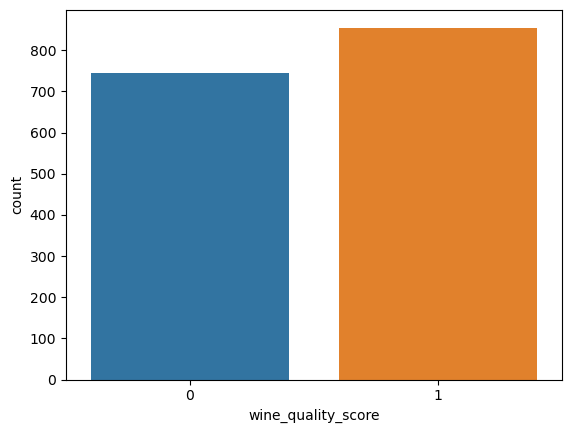

In [18]:
# visualising to cross-check the imbalance
sns.countplot(x = 'wine_quality_score', data = df)

From the above grapgh, we can confirm that there is no significant gap between the classes 0 and 1

# Feature exploration, Cleaning, engineering and selection

In [19]:
# checking the first 10 rows
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [20]:
# checking the last 10 rows
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,1
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,1
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


by observing the 10 first and 10 last rows, we can see that all features are float data type, and the target variable is binary class categorical (target variable type is already known above)

In [21]:
# detailed information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  wine_quality_score    1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here we can see that all the features are float data type. No column contains missing data/value

In [22]:
# double-checking data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_quality_score        int64
dtype: object

We can also see that all features are float data type. but wine_quality_score is showing as int64 instead (this could have lead to a cross-check if we didn’t already know that it is a categorical binary variable)

In [23]:
# cross-checking data types

df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
wine_quality_score        2
dtype: int64

from the unique values counts, we can be tempted to say that features are not float data, because all their unique value counts are very very less than the number of observation/rows.

But, in real-life, these values are measurable concentrations with infinite number of values.

Based on this, we can confirm that all the features are float data type

In [34]:
# cross-checking missing values in each column

no_null_col = []
for i in df.columns:
    if df[i].value_counts().sum() == df.shape[0]:
        no_null_col.append(i)

no_null_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

In [40]:
# checking missing values in each column

no_null_col = []
for i in df.columns:
    if df[i].value_counts().sum() < df.shape[0]:
        no_null_col.append(i)

no_null_col

[]

We observe that potentially there is no missing value. But we need to check whether there are empty space, which in case will be considered as missing data points

In [35]:
# checking if there is space present in any column
no_null = []
for i in df.columns:
    if df[i].nunique('') != 0:
        no_null.append(i)

no_null

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

In [39]:
# checking if there is space present in any column
no_null = []
for i in df.columns:
    if df[i].nunique('') == 0:
        no_null.append(i)

no_null

[]

In [46]:
# cross-checking if there is space value present in any column
for i in df.columns:
    print(df[i].value_counts(), '\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

We can confirm there is no space in any row. This lead to the conclusion that there is no missing value in the data

In [47]:
# checking for duplicates

duplicate = df[df.duplicated()]
duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


In [85]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


In [72]:
duplicate.shape

(240, 12)

In [70]:
duplicate.nunique()

fixed acidity            64
volatile acidity         77
citric acid              64
residual sugar           44
chlorides                69
free sulfur dioxide      43
total sulfur dioxide     94
density                 148
pH                       66
sulphates                57
alcohol                  41
wine_quality_score        2
dtype: int64

In [67]:
duplicate.shape

(240, 12)

In [73]:
df.duplicated().sum()

240

We can confirm that there are 240 duplicated rows in the dataset

In [74]:
# checking if removing duplicates can create data lost. 

p = ((df.shape[0]-df.duplicated().sum())/df.shape[0]*100)

print('percentage of non duplicated rows= ', p)

percentage of non duplicated rows=  84.9906191369606


- If we remove all duplicates, we will loose more that 15% of our data, which is not good for data consistently.

- But these duplicates seem to be like purposely repetitive measurements of the concentrations instead of any mistake in data management

# let's create a second data set with duplicates removed, and compare along with the original to see if duplicates are negatively impacting the trends

In [86]:
df1 = df.drop_duplicates()

In [87]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [88]:
# summary statistics df1
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.529065
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.499338
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [89]:
# summary statistics df1
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


mean, std, min, Q1, median, Q3, max are the same for both df and df1

Checking for outliers

In [187]:
col_n = []
for i in df1.columns:
    col_n.append(i)
col_n

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

In [117]:
def graph(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 20), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()
            
            
        
    

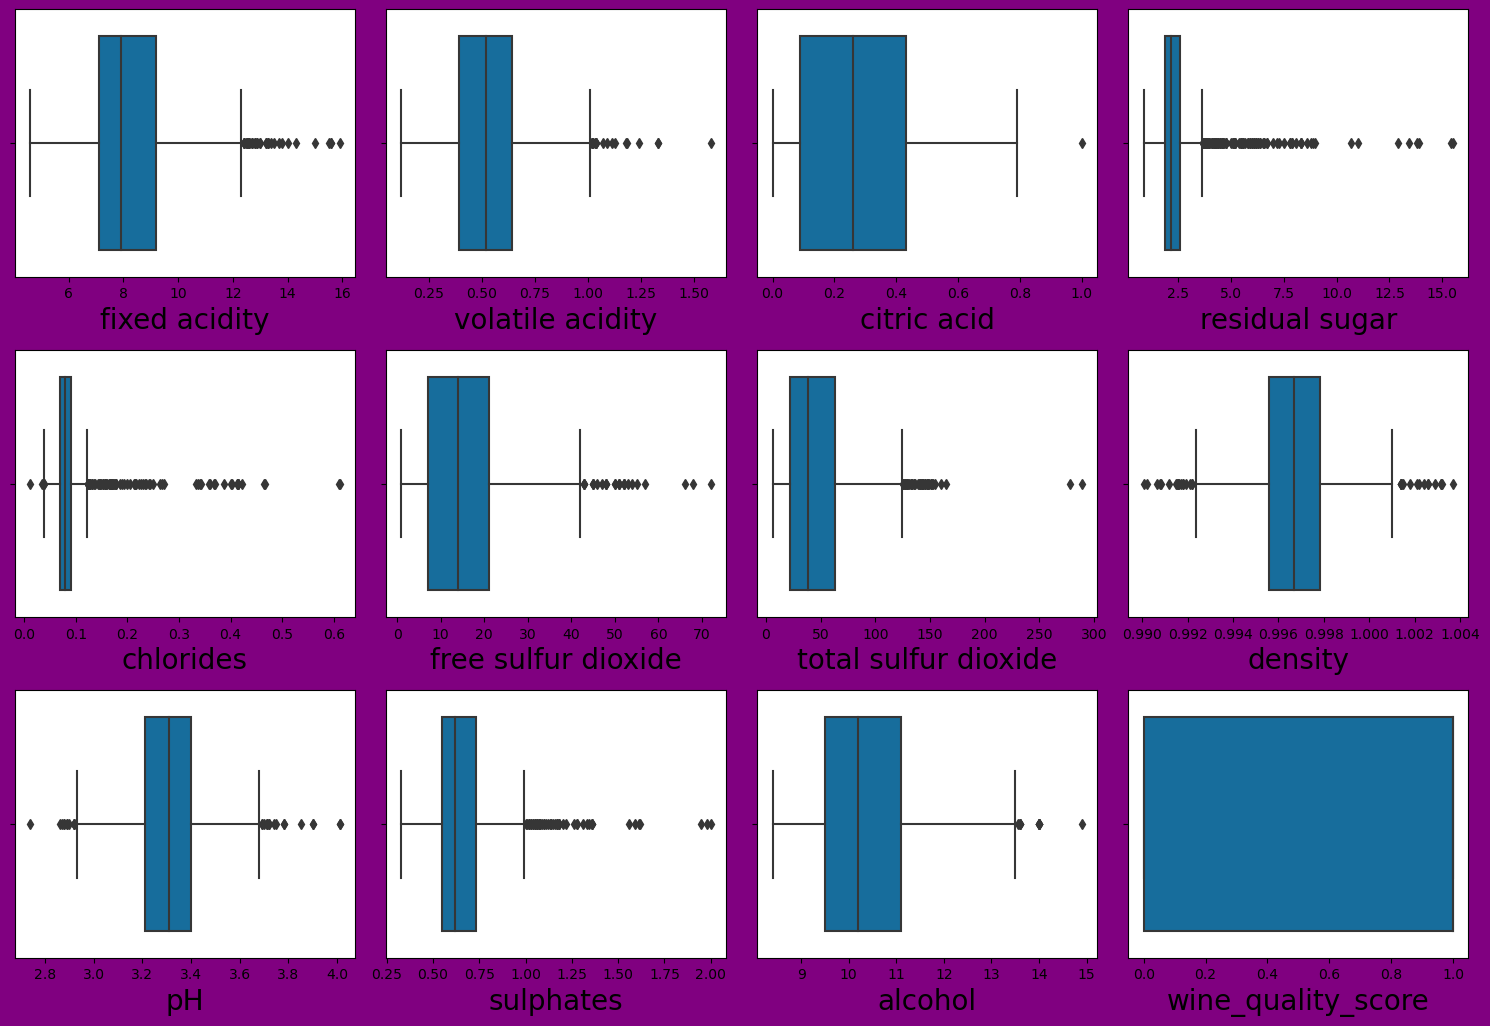

In [118]:
graph(col_n, df1, 12, 6, 4, 20)

In [119]:
# for df

col_nam = []
for i in df.columns:
    col_nam.append(i)
col_nam

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

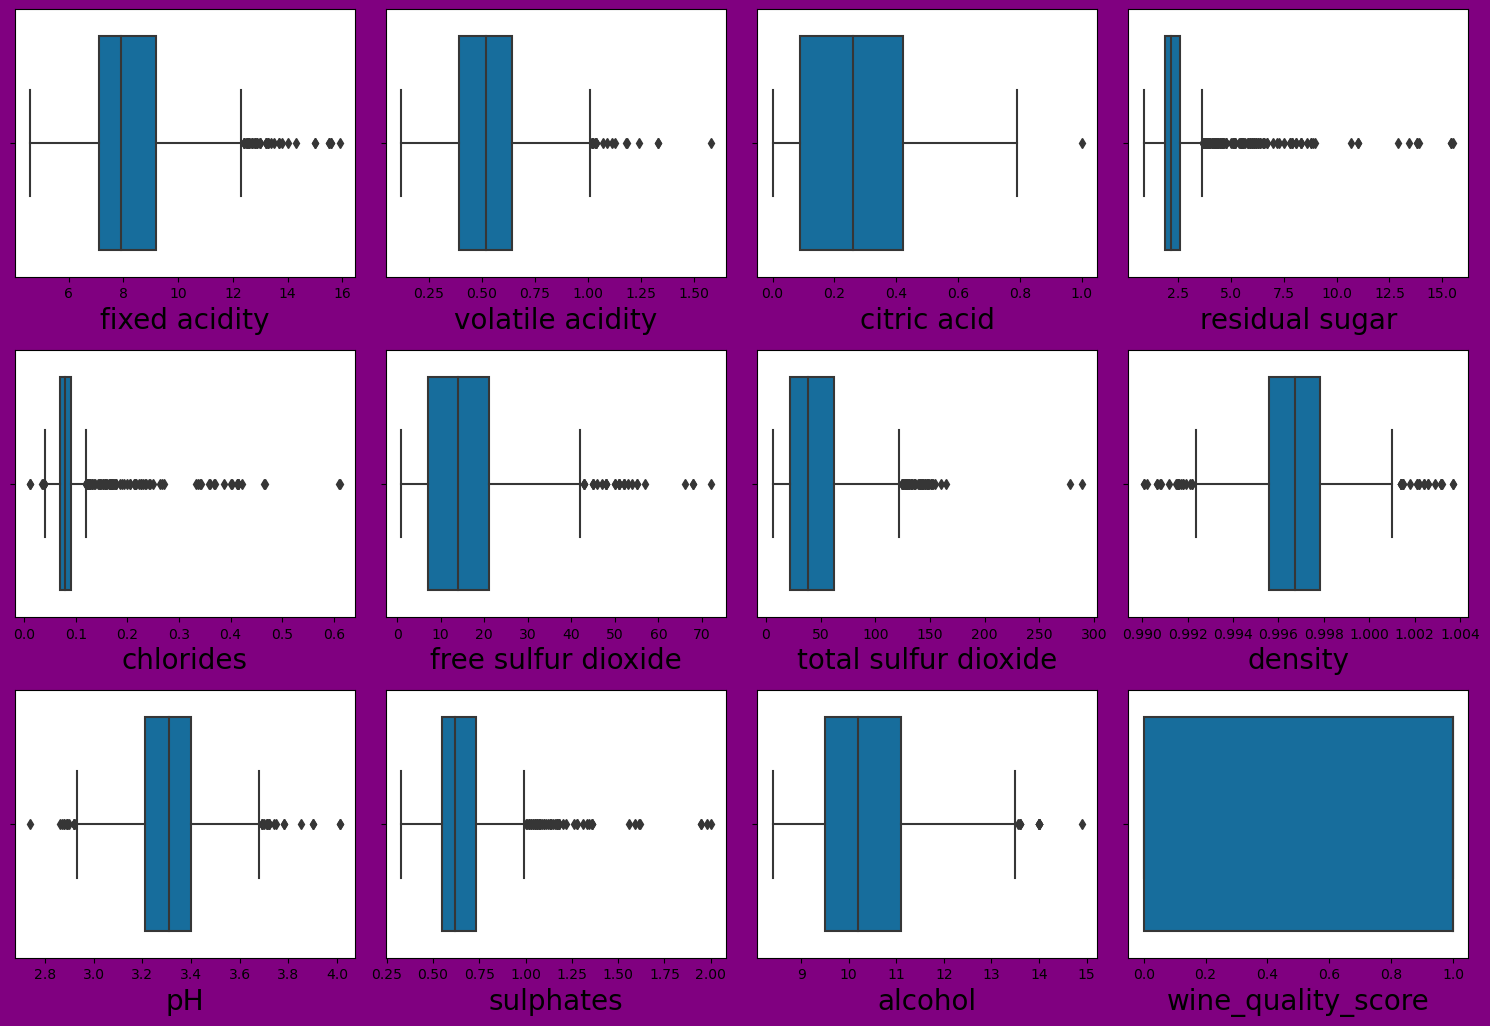

In [120]:
graph(col_n, df, 12, 6, 4, 20)

We can observe from both df1 and df2 that all the columns contain outliers

In [258]:
# removing outliers using IQR
Q1 = df1.quantile(0.25)

Q3 = df1.quantile(0.75)

IQR = Q3-Q1

x = Q1-1.5*IQR
y = Q3+1.5*IQR



In [259]:
x

fixed acidity            3.95000
volatile acidity         0.01500
citric acid             -0.42000
residual sugar           0.85000
chlorides                0.03850
free sulfur dioxide    -14.00000
total sulfur dioxide   -39.50000
density                  0.99227
pH                       2.92500
sulphates                0.28000
alcohol                  7.10000
wine_quality_score      -1.50000
dtype: float64

In [260]:
y

fixed acidity            12.35000
volatile acidity          1.01500
citric acid               0.94000
residual sugar            3.65000
chlorides                 0.12250
free sulfur dioxide      42.00000
total sulfur dioxide    124.50000
density                   1.00115
pH                        3.68500
sulphates                 1.00000
alcohol                  13.50000
wine_quality_score        2.50000
dtype: float64

In [314]:
""" for df1: let's first remove outliers and replace them with NaN, in controling data lost, as we already face 
a high risk of data lost due to duplicates"""
d1 = df1[(df1 < y) & (df1 > x)]

In [315]:
d1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [316]:
d1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1318.000000,1340.000000,1358.000000,1233.000000,1272.000000,1330.000000,1314.000000,1324.000000,1331.000000,1304.000000,1346.000000,1359.000000
mean,8.157587,0.520933,0.271797,2.188605,0.078771,15.141353,43.407534,0.996710,3.307258,0.635199,10.399071,0.529065
std,1.518211,0.168678,0.194608,0.456845,0.015560,9.153545,27.716674,0.001672,0.141203,0.119526,1.032140,0.499338
min,4.600000,0.120000,0.000000,0.900000,0.039000,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,7.000000,21.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.100000,0.078000,13.000000,37.000000,0.996700,3.310000,0.610000,10.100000,1.000000
75%,9.100000,0.635000,0.430000,2.500000,0.088000,21.000000,60.000000,0.997800,3.400000,0.710000,11.100000,1.000000
max,12.300000,1.010000,0.790000,3.650000,0.122000,41.000000,124.000000,1.001000,3.680000,0.990000,13.400000,1.000000


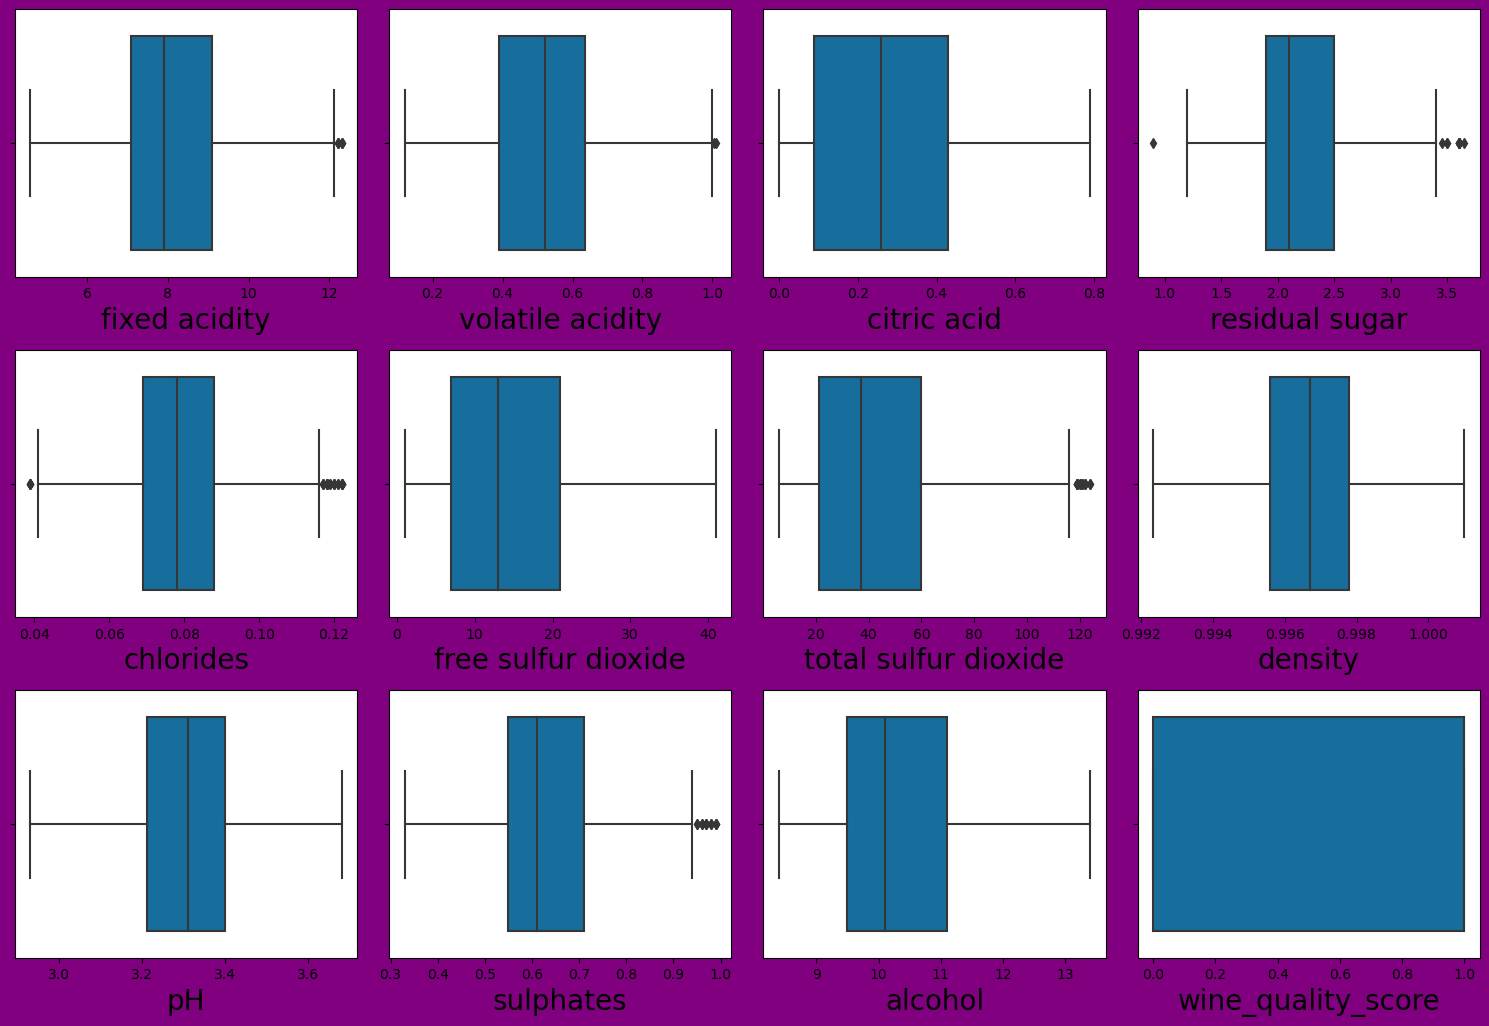

In [317]:
graph(col_n, d1, 12, 6, 4, 20)

In [273]:
df1_f.isna().sum()

fixed acidity            41
volatile acidity         19
citric acid               1
residual sugar          126
chlorides                87
free sulfur dioxide      29
total sulfur dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  13
wine_quality_score        0
dtype: int64

In [275]:
# for df
d = df[(df < y)  & (df > x)]

In [276]:
d

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


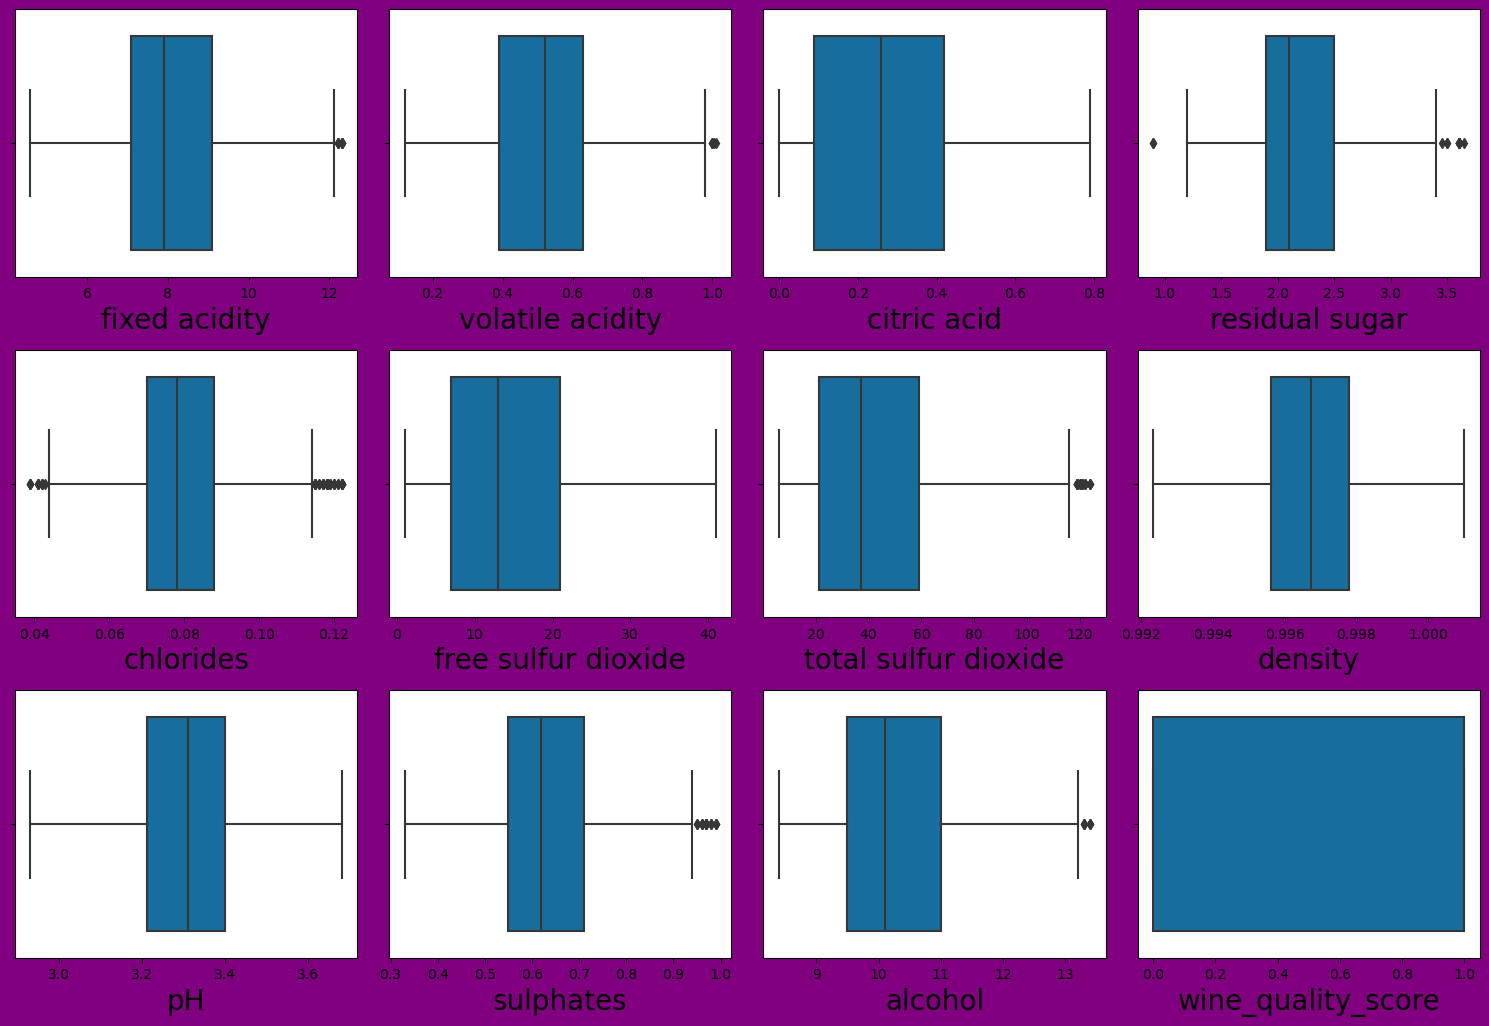

In [277]:
graph(col_n, d, 12, 6, 4, 20)

In [247]:
df_f.isna().sum()

fixed acidity            81
volatile acidity         36
citric acid               1
residual sugar          169
chlorides               140
free sulfur dioxide      61
total sulfur dioxide     80
density                  79
pH                       63
sulphates                76
alcohol                  23
wine_quality_score        0
dtype: int64

we can see that this is still leaving many outliers on both df and df1 at the same rate

In [278]:
# let's change the treshold and check

Q1 = df1.quantile(0.25)

Q3 = df1.quantile(0.75)

IQR = Q3-Q1

x1 = Q1-1.2*IQR
y1 = Q3+1.2*IQR

In [282]:
# fro df1
d11 = df1[(df1 < y1) & (df1 > x1)]
d11

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,NaN,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [283]:
d11.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1291.000000,1326.000000,1358.000000,1221.000000,1235.000000,1308.000000,1288.000000,1293.000000,1308.000000,1291.000000,1337.000000,1359.000000
mean,8.077227,0.516112,0.271797,2.177191,0.078621,14.732798,41.894022,0.996720,3.306927,0.632308,10.379693,0.529065
std,1.427322,0.162860,0.194608,0.438138,0.014260,8.664642,25.838447,0.001567,0.134470,0.115304,1.008068,0.499338
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,7.000000,21.000000,0.995660,3.210000,0.550000,9.500000,0.000000
50%,7.800000,0.510000,0.260000,2.100000,0.078000,13.000000,36.000000,0.996700,3.310000,0.610000,10.100000,1.000000
75%,9.000000,0.630000,0.430000,2.500000,0.087000,20.000000,58.000000,0.997800,3.400000,0.705000,11.100000,1.000000
max,11.700000,0.935000,0.790000,3.400000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


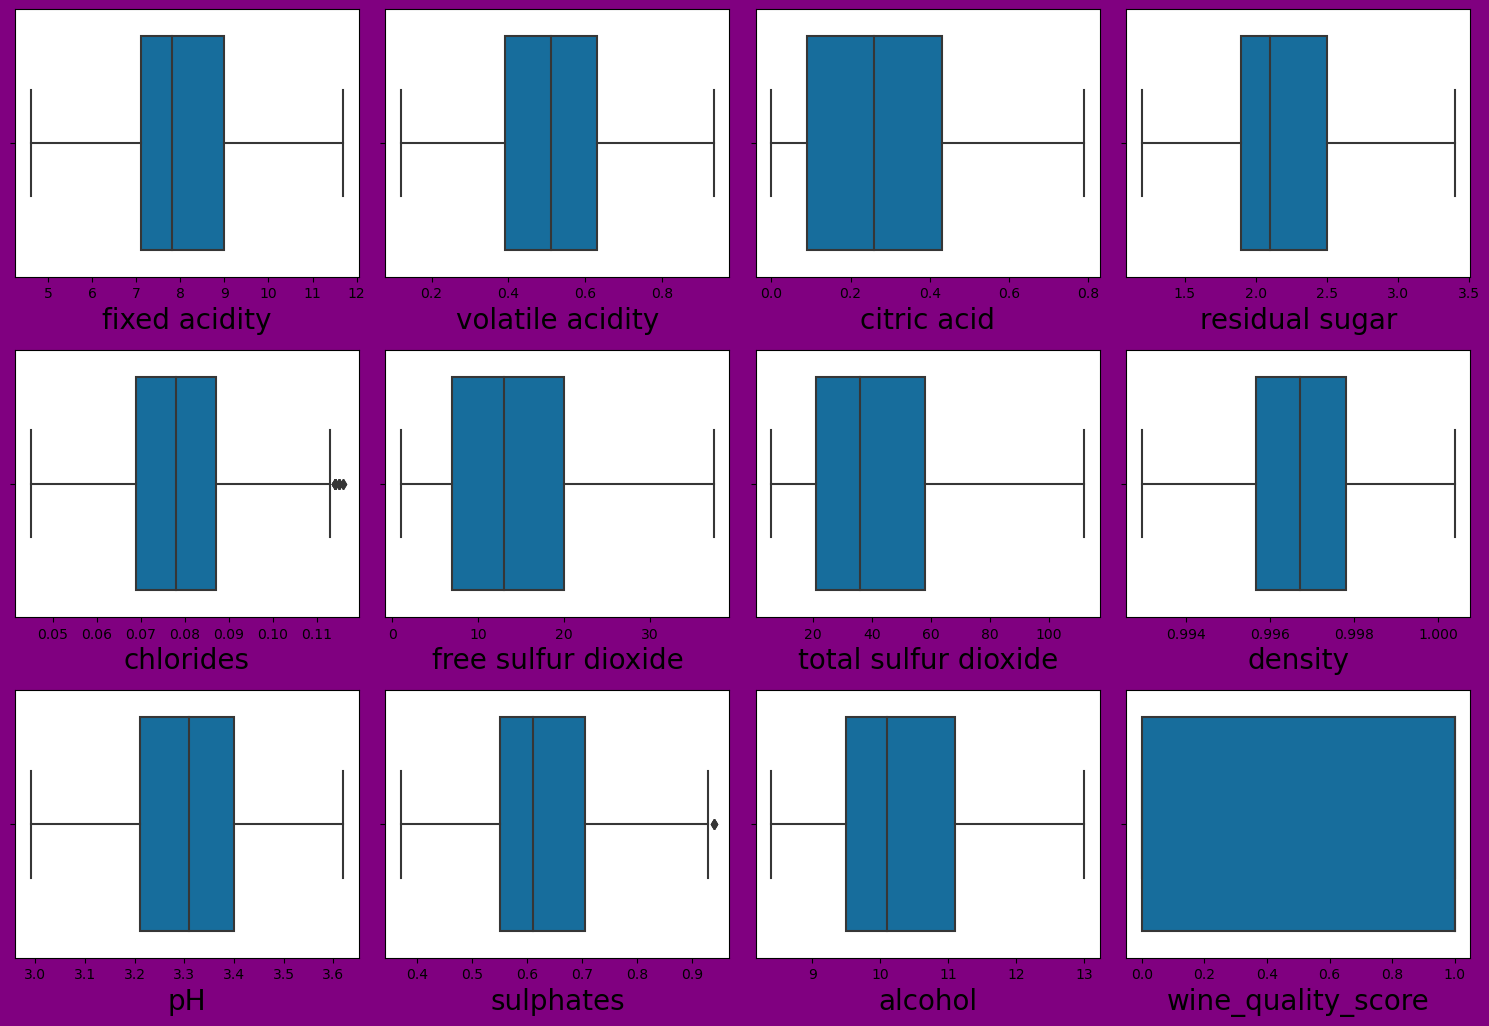

In [284]:
graph(col_n, d11, 12, 6, 4, 20)

In [285]:
d11.isna().sum()

fixed acidity            68
volatile acidity         33
citric acid               1
residual sugar          138
chlorides               124
free sulfur dioxide      51
total sulfur dioxide     71
density                  66
pH                       51
sulphates                68
alcohol                  22
wine_quality_score        0
dtype: int64

In [286]:
# for df
dd = df[(df < y1) & (df > x1)]
dd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,NaN,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [287]:
dd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1518.000000,1563.000000,1598.000000,1430.000000,1459.000000,1538.000000,1519.000000,1520.000000,1536.000000,1523.000000,1576.000000,1599.000000
mean,8.081291,0.515589,0.270519,2.169930,0.078676,14.692133,41.763660,0.996746,3.308320,0.633106,10.375941,0.534709
std,1.420708,0.160482,0.194006,0.430049,0.014061,8.628529,25.663343,0.001569,0.133424,0.116392,0.997928,0.498950
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995675,3.210000,0.550000,9.500000,0.000000
50%,7.800000,0.510000,0.260000,2.100000,0.078000,13.000000,36.000000,0.996750,3.310000,0.610000,10.100000,1.000000
75%,9.000000,0.630000,0.420000,2.400000,0.087000,20.000000,57.000000,0.997800,3.400000,0.710000,11.000000,1.000000
max,11.700000,0.935000,0.790000,3.400000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


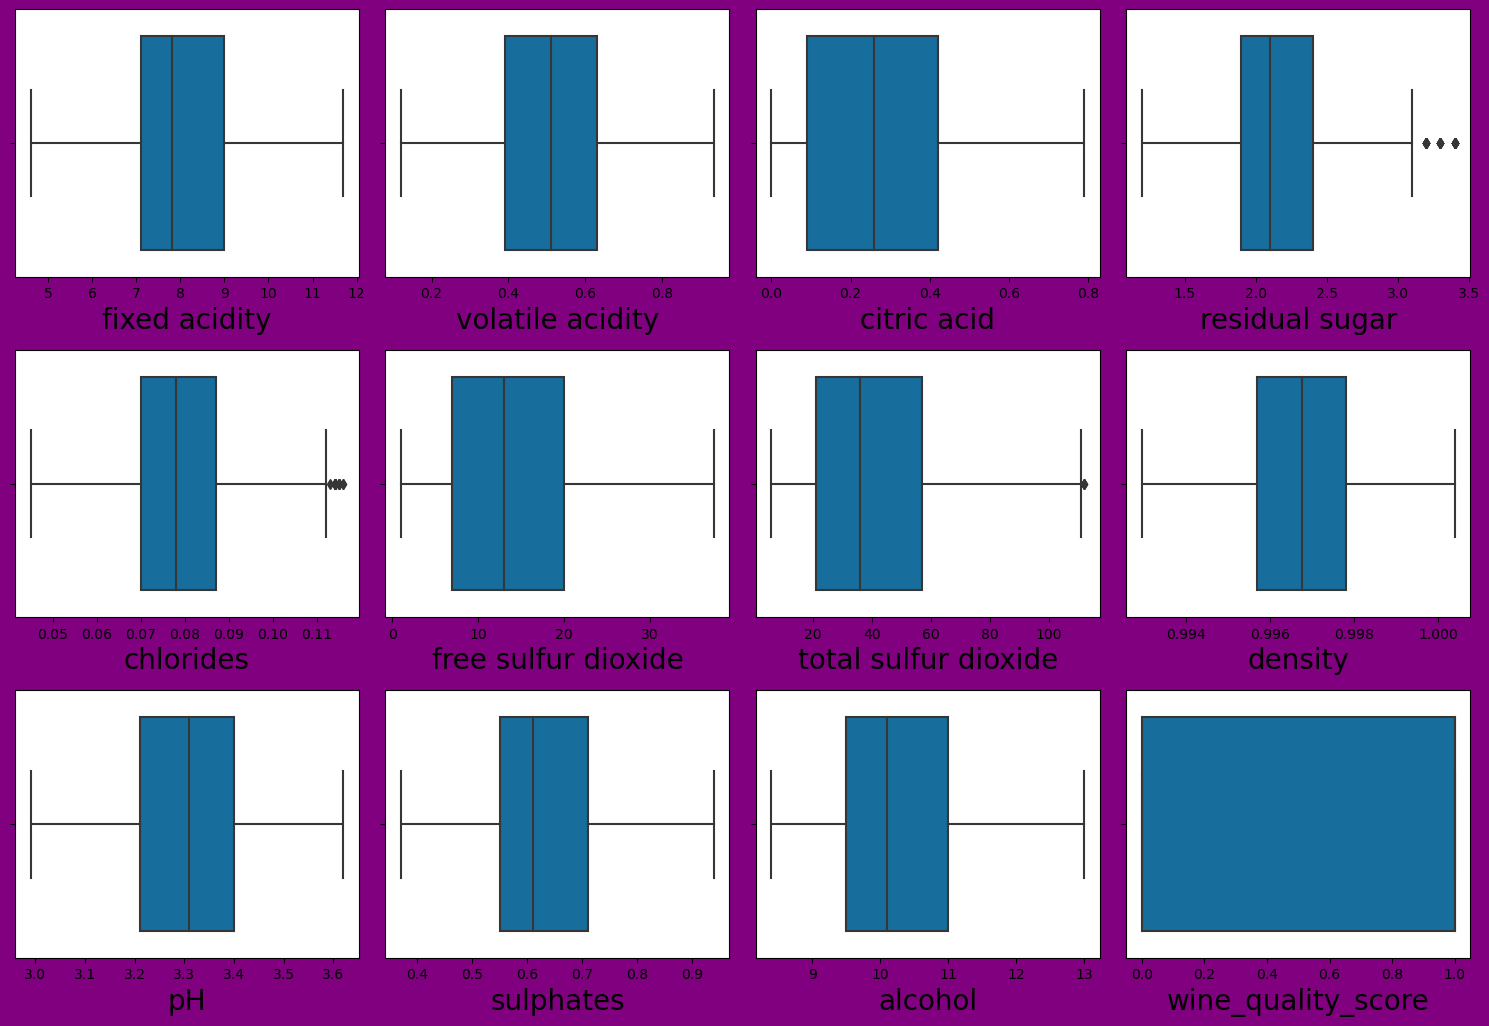

In [298]:
graph(col_nam, dd, 12, 6, 4, 20)

using z score for outlier removal

In [ ]:
col_n = []
for i in df1.columns:
    col_n.append(i)
col_n

In [289]:
# df1

from scipy.stats import zscore

 
    
z = np.abs(zscore(df1[col_n]))

z




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374,1.059923
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575,1.059923
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575,1.059923
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575,0.943464
5,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374,1.059923
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924,0.943464
1594,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574,1.059923
1595,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723,0.943464
1597,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775,1.059923


In [290]:
df0 = df1[(z<2.5).all(axis = 1)]

In [291]:
df0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [292]:
df0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,8.243272,0.522080,0.257520,2.329771,0.081185,14.943712,42.712401,0.996650,3.317942,0.639270,10.389138,0.533861
std,1.553163,0.166608,0.186997,0.718542,0.020121,8.945374,27.473786,0.001628,0.135164,0.124715,0.989195,0.499072
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992200,2.940000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,36.000000,0.996650,3.320000,0.620000,10.200000,1.000000
75%,9.100000,0.635000,0.410000,2.600000,0.089000,20.000000,58.000000,0.997640,3.400000,0.710000,11.100000,1.000000
max,12.600000,0.980000,0.760000,5.900000,0.200000,42.000000,130.000000,1.001000,3.690000,1.080000,13.100000,1.000000


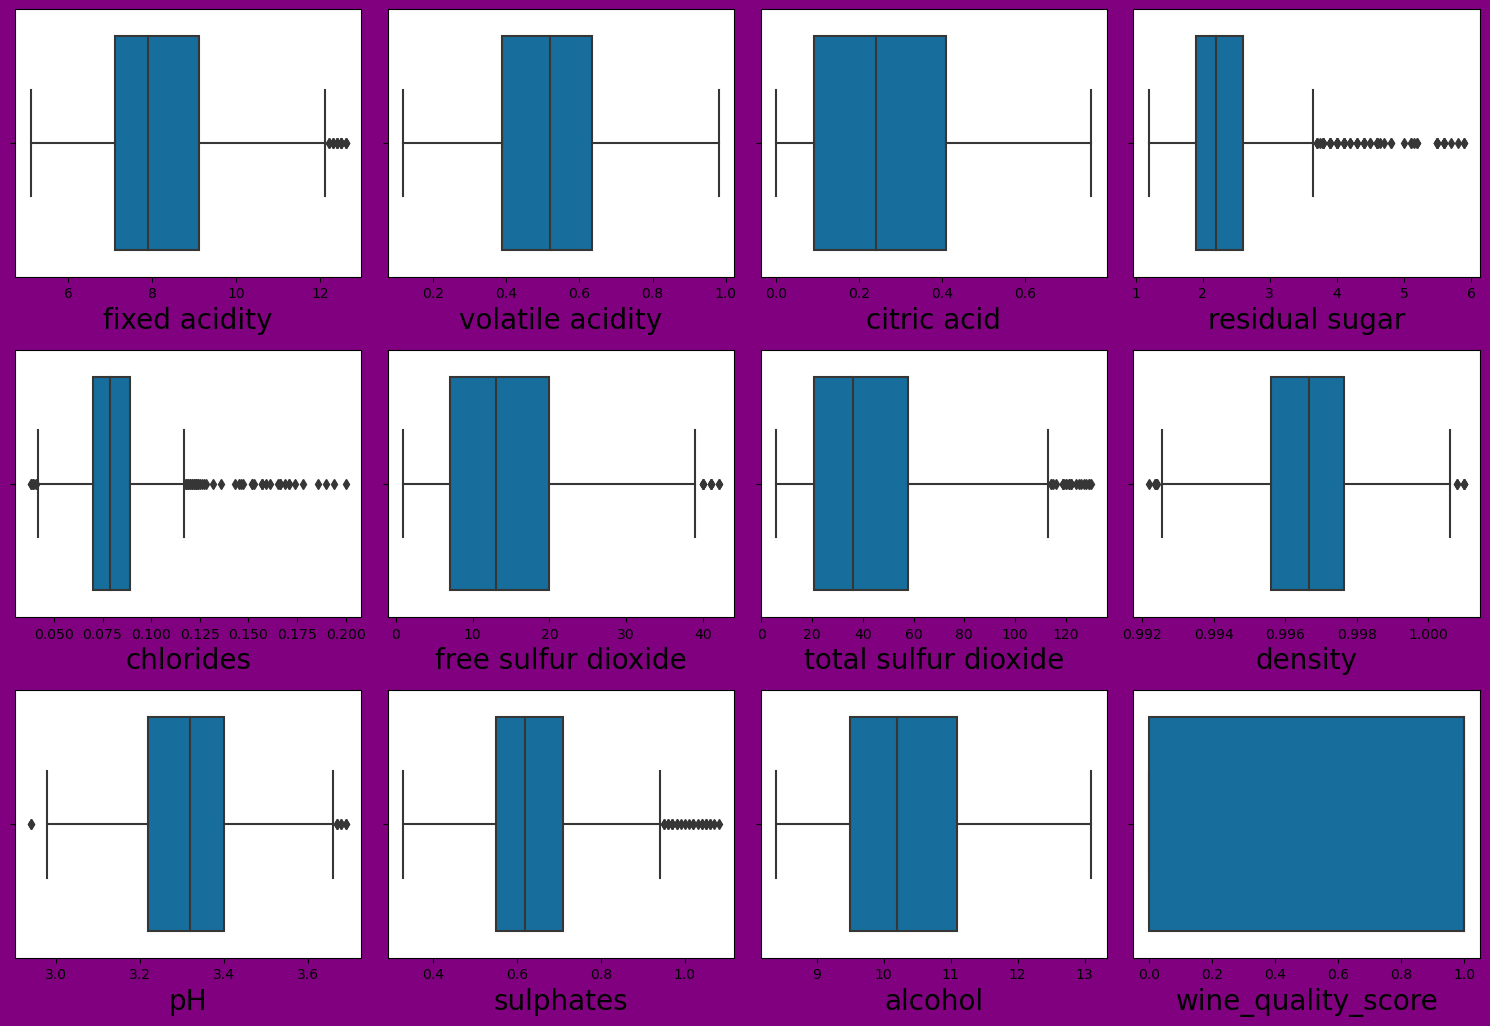

In [293]:
graph(col_n, df0, 12, 6, 4, 20)

In [254]:
df0.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality_score      0
dtype: int64

We can clearly see that IQR is a better method in removing outlier in this dataset

Plotting the distribution of d11 and dd. This is just to compare the distribution in both d11 and dd to see whether duplicates influence the trend in the data. So, no worries for skewness at this stage.

In [295]:
def graph1(columns, data, k, t, a, b, c, d):
    plt.figure(figsize = (k, t), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.distplot(data[i], color = 'r')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()
            
            

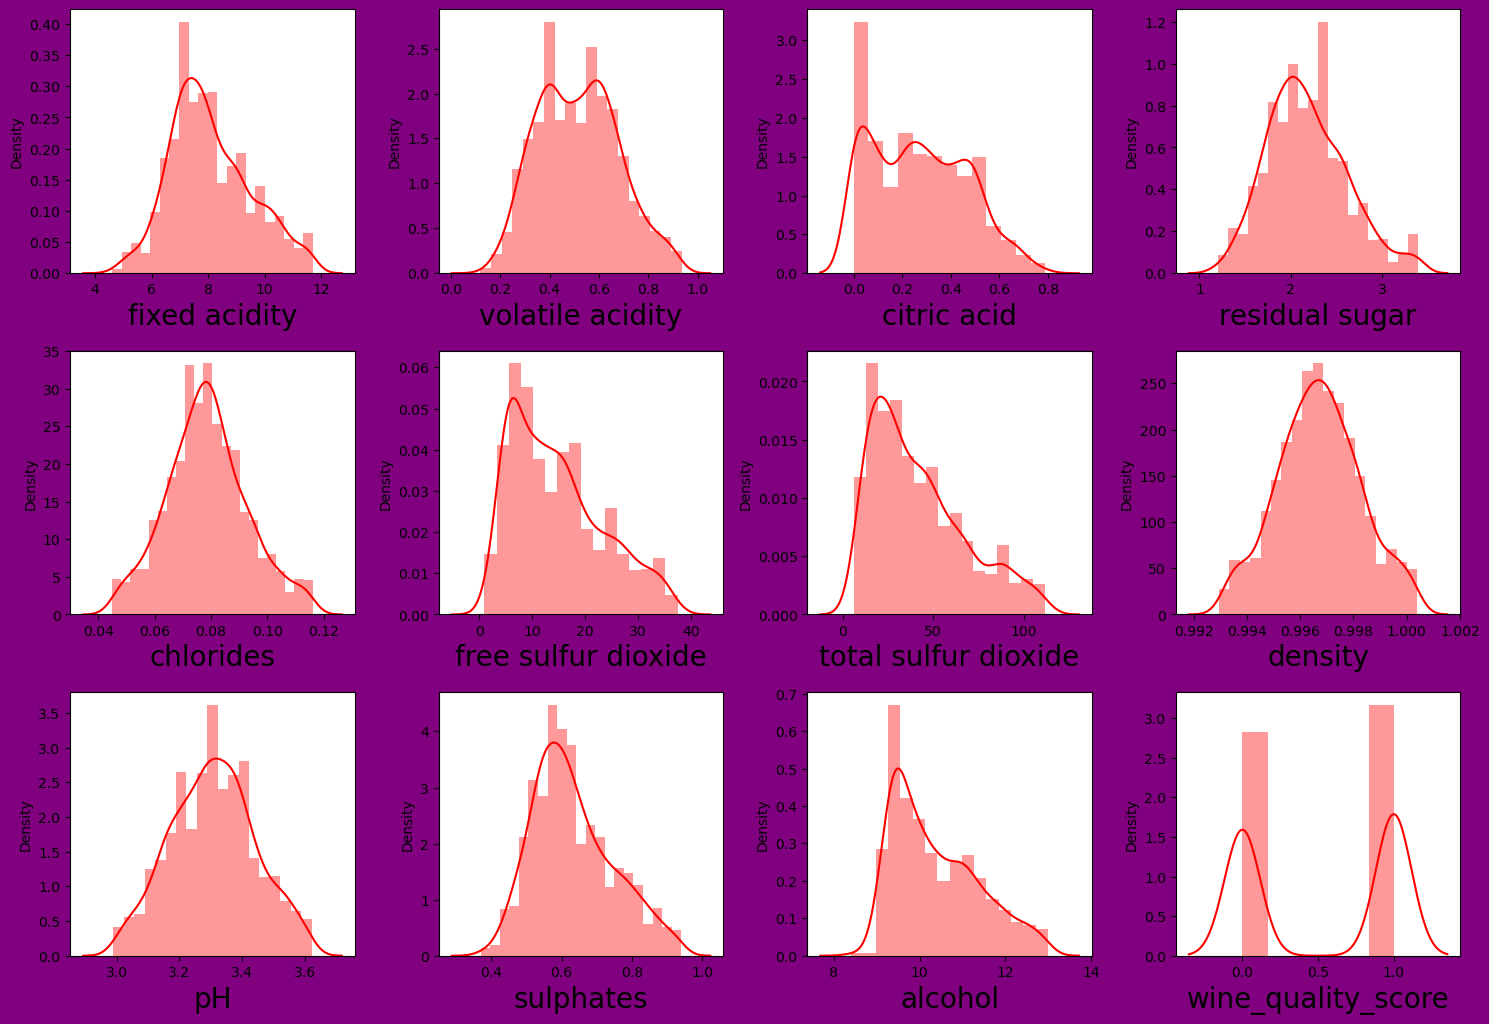

In [296]:
graph1(col_n, d11, 15, 20, 12, 6, 4, 20)

In [300]:
d11.skew()

fixed acidity           0.446051
volatile acidity        0.216200
citric acid             0.287149
residual sugar          0.467573
chlorides               0.195595
free sulfur dioxide     0.680179
total sulfur dioxide    0.827770
density                 0.052053
pH                      0.034964
sulphates               0.539276
alcohol                 0.684166
wine_quality_score     -0.116588
dtype: float64

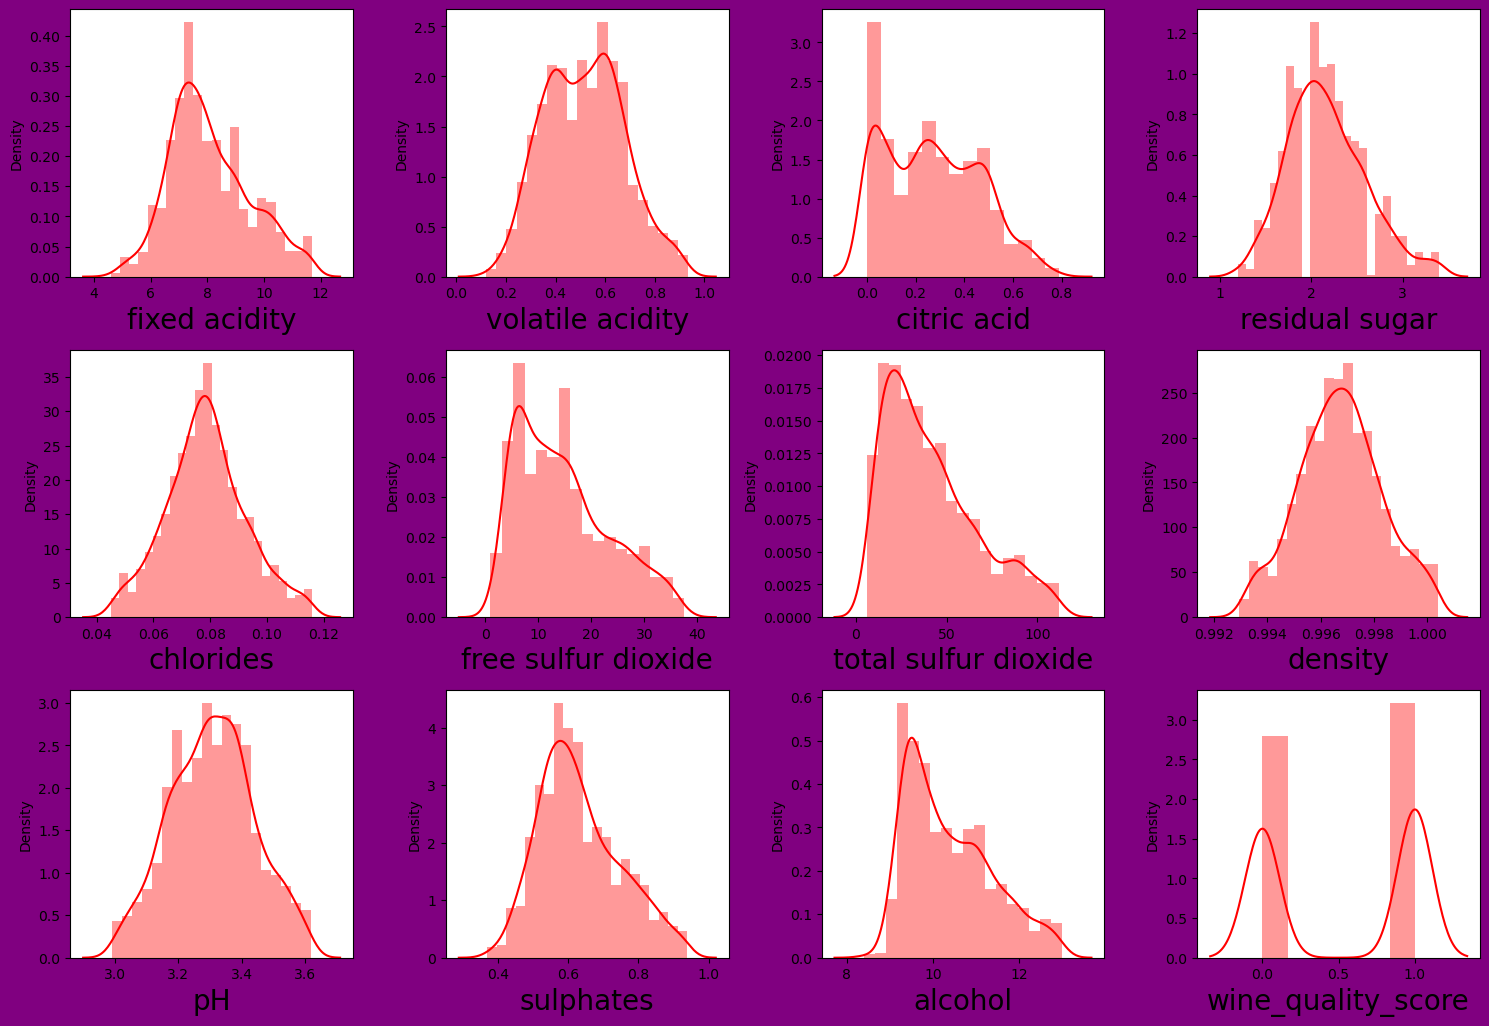

In [299]:
graph1(col_nam, dd, 15, 20, 12, 6, 4, 20)

let's replace NaN left by duplicate removal in d11 and dd

In [301]:
d11.isna().sum()

fixed acidity            68
volatile acidity         33
citric acid               1
residual sugar          138
chlorides               124
free sulfur dioxide      51
total sulfur dioxide     71
density                  66
pH                       51
sulphates                68
alcohol                  22
wine_quality_score        0
dtype: int64

In [310]:
dd.isna().sum()

fixed acidity            81
volatile acidity         36
citric acid               1
residual sugar          169
chlorides               140
free sulfur dioxide      61
total sulfur dioxide     80
density                  79
pH                       63
sulphates                76
alcohol                  23
wine_quality_score        0
dtype: int64

In [309]:
d11.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality_score'],
      dtype='object')

In [311]:
dd.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality_score'],
      dtype='object')

In [306]:
for i in d11.columns:
    d11[i] = d11[i].fillna(d11[i].mean())
    



In [307]:
d11

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.900000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.600000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.300000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.900000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.800000,0.075,13.000000,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.900000,0.068,28.000000,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.000000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.200000,0.062,14.732798,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.000000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [308]:
d11.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality_score      0
dtype: int64

In [318]:
for i in dd.columns:
    dd[i] = dd[i].fillna(dd[i].mean())

In [319]:
dd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.60000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.30000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.90000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.20000,0.062,14.692133,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.30000,0.076,29.000000,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.00000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [320]:
dd.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality_score      0
dtype: int64

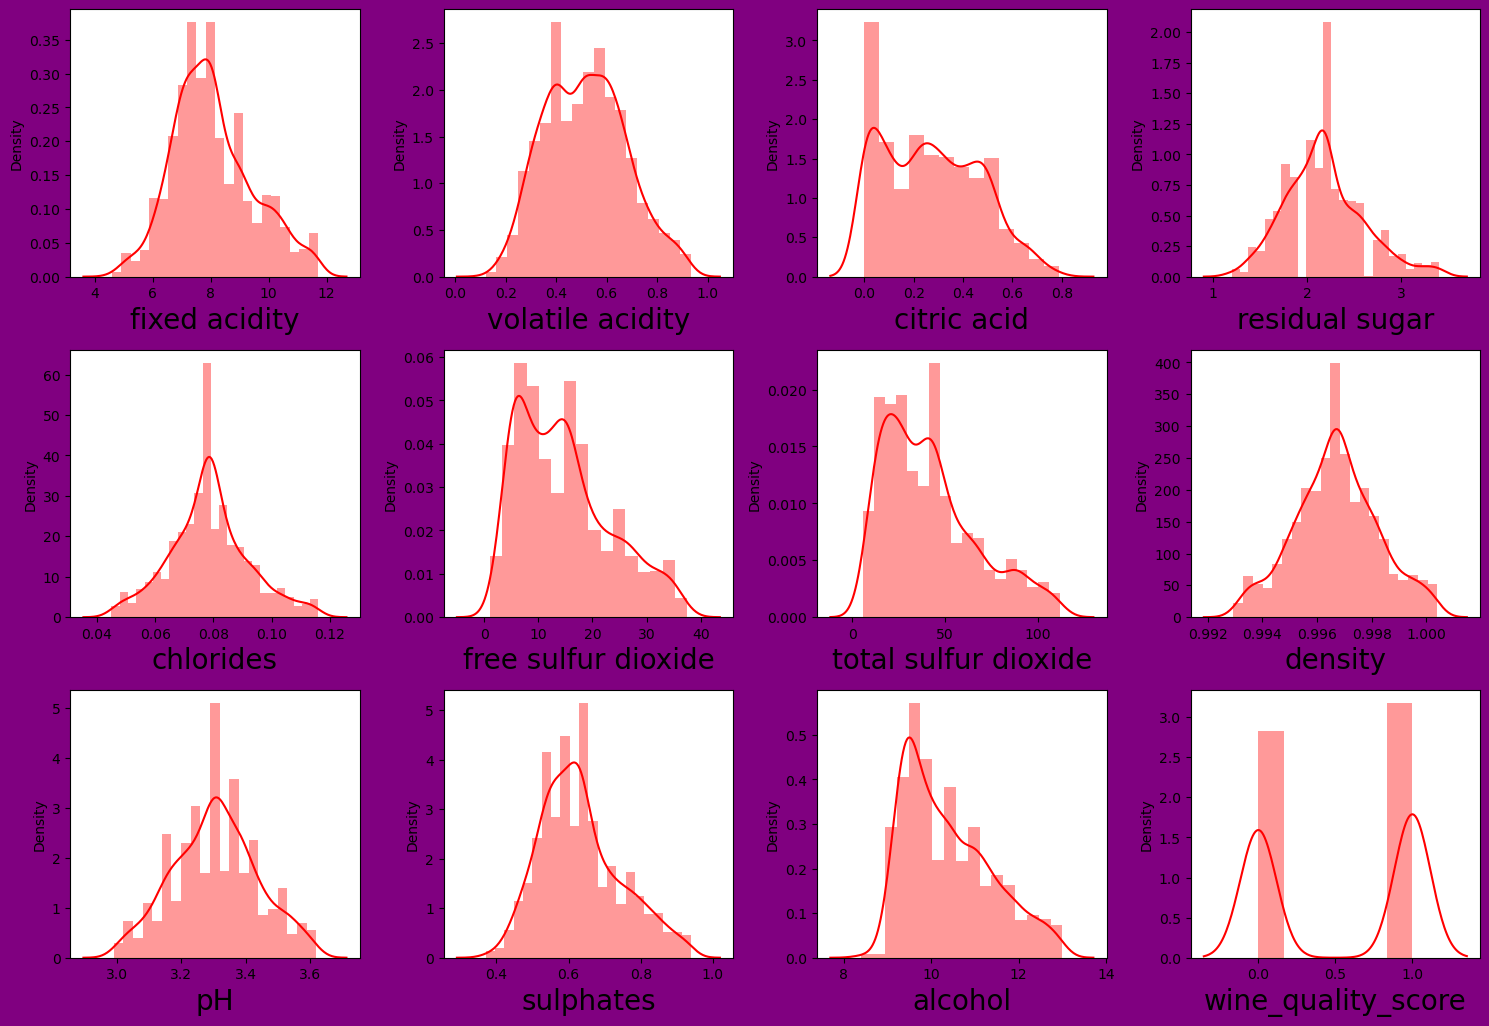

In [321]:
graph1(col_n, d11, 15, 20, 12, 6, 4, 20)

In [323]:
d11.skew()

fixed acidity           0.457621
volatile acidity        0.218867
citric acid             0.287255
residual sugar          0.493227
chlorides               0.205157
free sulfur dioxide     0.693283
total sulfur dioxide    0.850227
density                 0.053362
pH                      0.035637
sulphates               0.553264
alcohol                 0.689759
wine_quality_score     -0.116588
dtype: float64

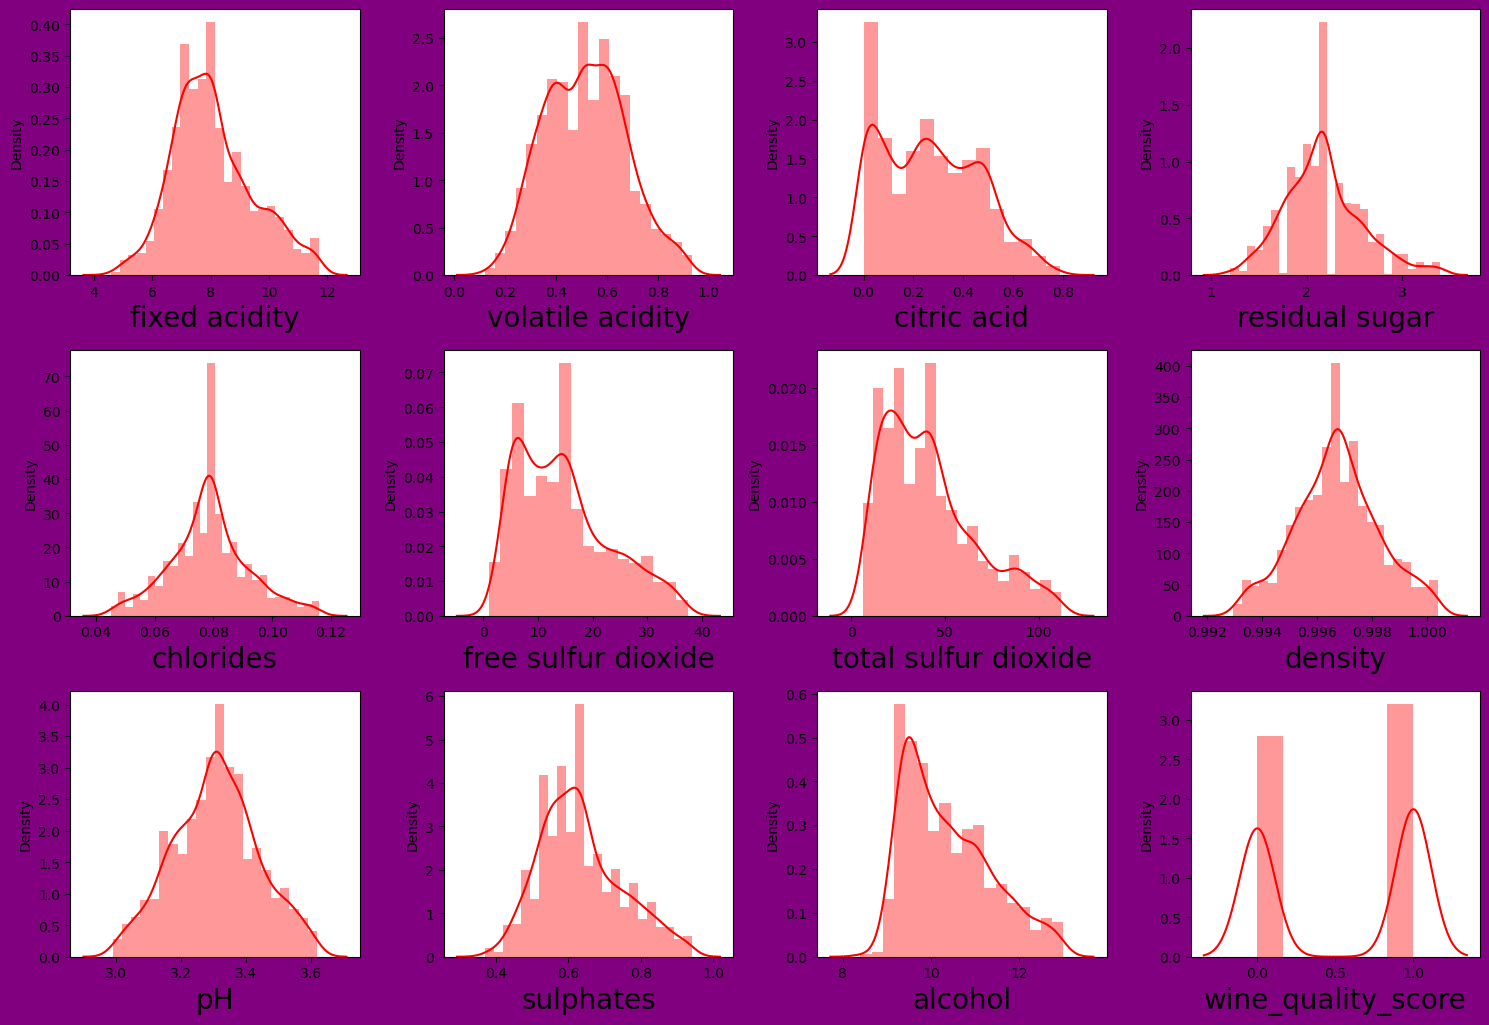

In [322]:
graph1(col_n, dd, 15, 20, 12, 6, 4, 20)

In [325]:
dd.skew()

fixed acidity           0.488974
volatile acidity        0.168229
citric acid             0.296359
residual sugar          0.510459
chlorides               0.186400
free sulfur dioxide     0.692385
total sulfur dioxide    0.862724
density                 0.061987
pH                      0.024624
sulphates               0.525416
alcohol                 0.692832
wine_quality_score     -0.139303
dtype: float64

In [327]:
d11.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.077227,0.516112,0.271797,2.177191,0.078621,14.732798,41.894022,0.996720,3.306927,0.632308,10.379693,0.529065
std,1.391128,0.160869,0.194536,0.415280,0.013594,8.500384,25.153926,0.001528,0.131921,0.112380,0.999870,0.499338
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995720,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.516112,0.260000,2.177191,0.078621,14.000000,38.000000,0.996720,3.306927,0.620000,10.200000,1.000000
75%,8.900000,0.630000,0.430000,2.400000,0.086000,20.000000,55.000000,0.997700,3.390000,0.700000,11.000000,1.000000
max,11.700000,0.935000,0.790000,3.400000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


In [328]:
dd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.081291,0.515589,0.270519,2.169930,0.078676,14.692133,41.763660,0.996746,3.308320,0.633106,10.375941,0.534709
std,1.384233,0.158664,0.193945,0.406673,0.013431,8.462239,25.012708,0.001529,0.130767,0.113590,0.990720,0.498950
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995725,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.515589,0.260000,2.169930,0.078676,14.000000,38.000000,0.996746,3.308320,0.620000,10.200000,1.000000
75%,8.900000,0.630000,0.420000,2.400000,0.086000,20.000000,55.000000,0.997700,3.390000,0.700000,11.000000,1.000000
max,11.700000,0.935000,0.790000,3.400000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


Up to this level, we can see that duplicates seem not to negatively influence the trends and patterns in the dataset. So, we assume those duplicates are not mistakes but might have been intentionally added to the data as repeated measurements. Based on this, we can continue with our full dataset.

In [391]:
df = dd

In [392]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.60000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.30000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.90000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.20000,0.062,14.692133,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.30000,0.076,29.000000,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.00000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [393]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.081291,0.515589,0.270519,2.169930,0.078676,14.692133,41.763660,0.996746,3.308320,0.633106,10.375941,0.534709
std,1.384233,0.158664,0.193945,0.406673,0.013431,8.462239,25.012708,0.001529,0.130767,0.113590,0.990720,0.498950
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995725,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.515589,0.260000,2.169930,0.078676,14.000000,38.000000,0.996746,3.308320,0.620000,10.200000,1.000000
75%,8.900000,0.630000,0.420000,2.400000,0.086000,20.000000,55.000000,0.997700,3.390000,0.700000,11.000000,1.000000
max,11.700000,0.935000,0.790000,3.400000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


In [394]:
# creating the list of column names
col = []
for i in df.columns:
    col.append(i)
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

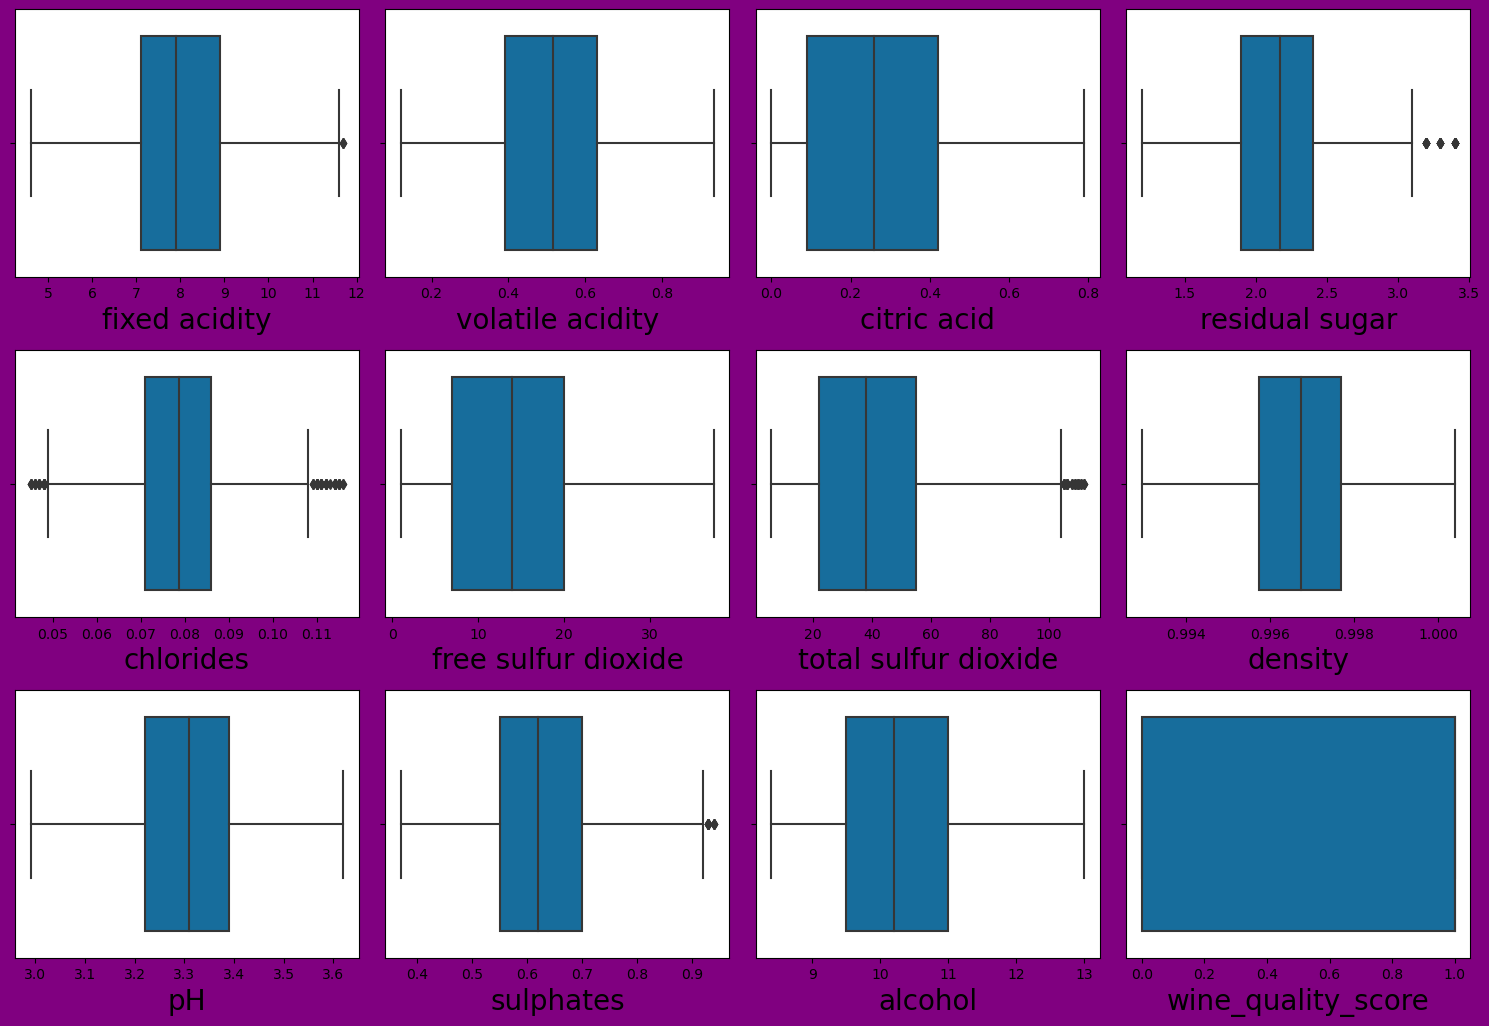

In [395]:
# checking outliers in the features
graph(col, df, 12, 6, 4, 20)

In [402]:
# removing outliers in the features using IQR
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

a = Q1-1.5*IQR
b = Q3+1.5*IQR



In [403]:
m = df[((df>a) & (df<b)).all(axis=1)]

In [404]:
m

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.60000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.30000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.90000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.20000,0.062,14.692133,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.30000,0.076,29.000000,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.00000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [405]:
m.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality_score      0
dtype: int64

In [406]:
# let's check data lost


print('percentage of data lost= ', (df.shape[0]-m.shape[0])/df.shape[0]*100)

percentage of data lost=  9.1307066916823


In [407]:
col_m = []
for i in m.columns:
    col_m.append(i)
col_m

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_quality_score']

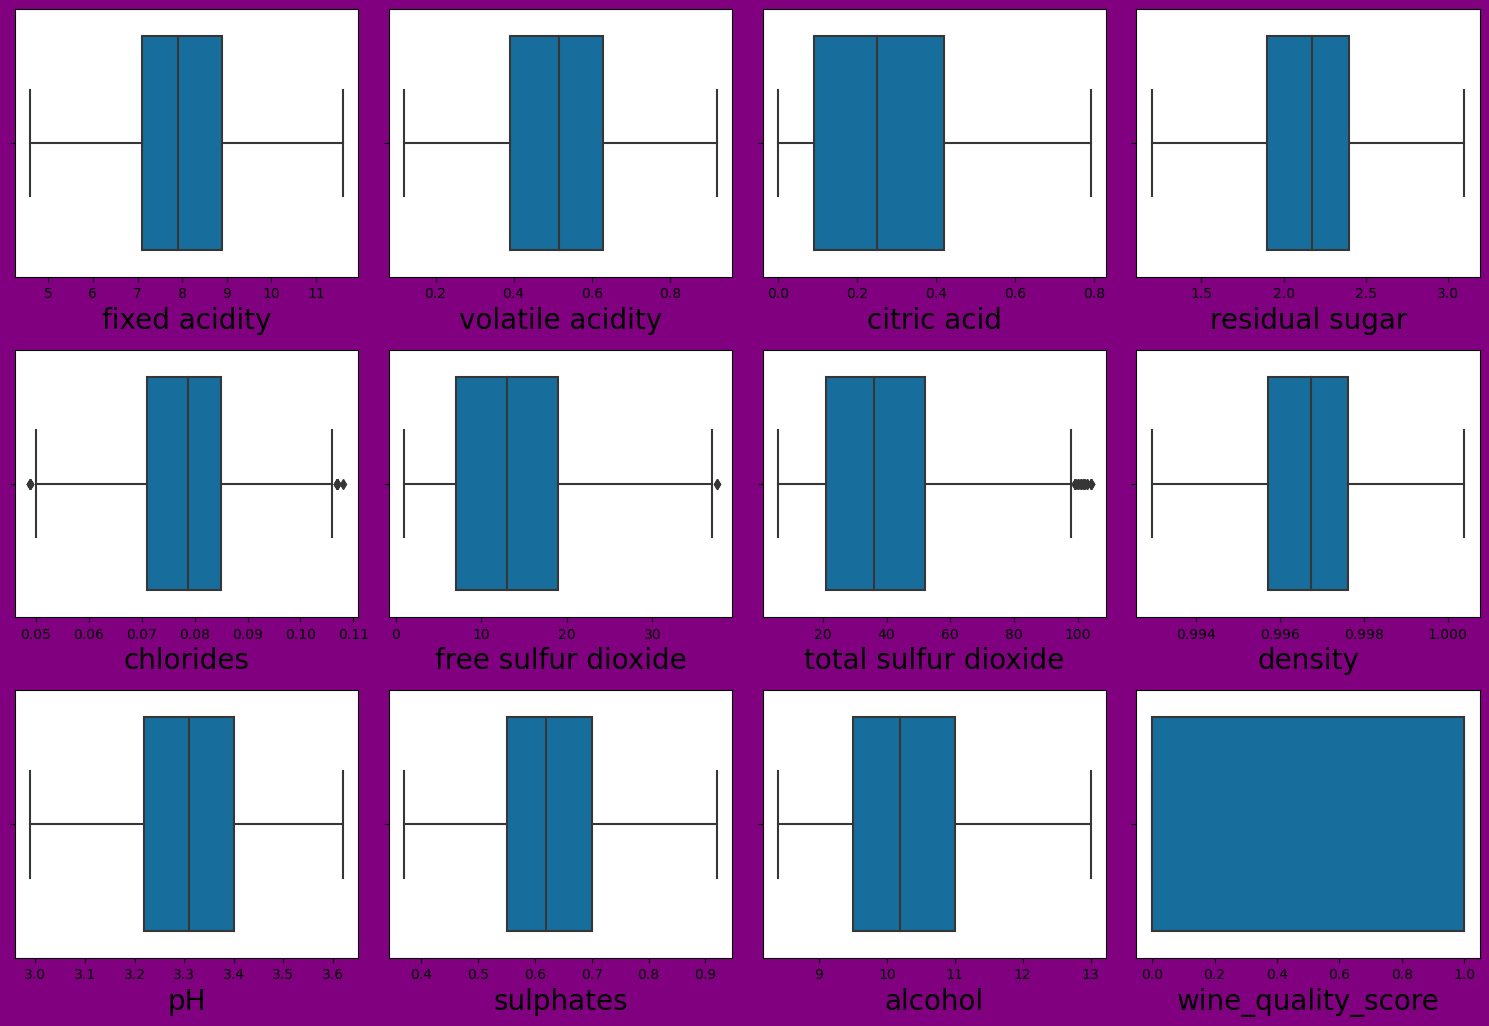

In [408]:
graph(col_m, m, 12, 6, 4, 20)

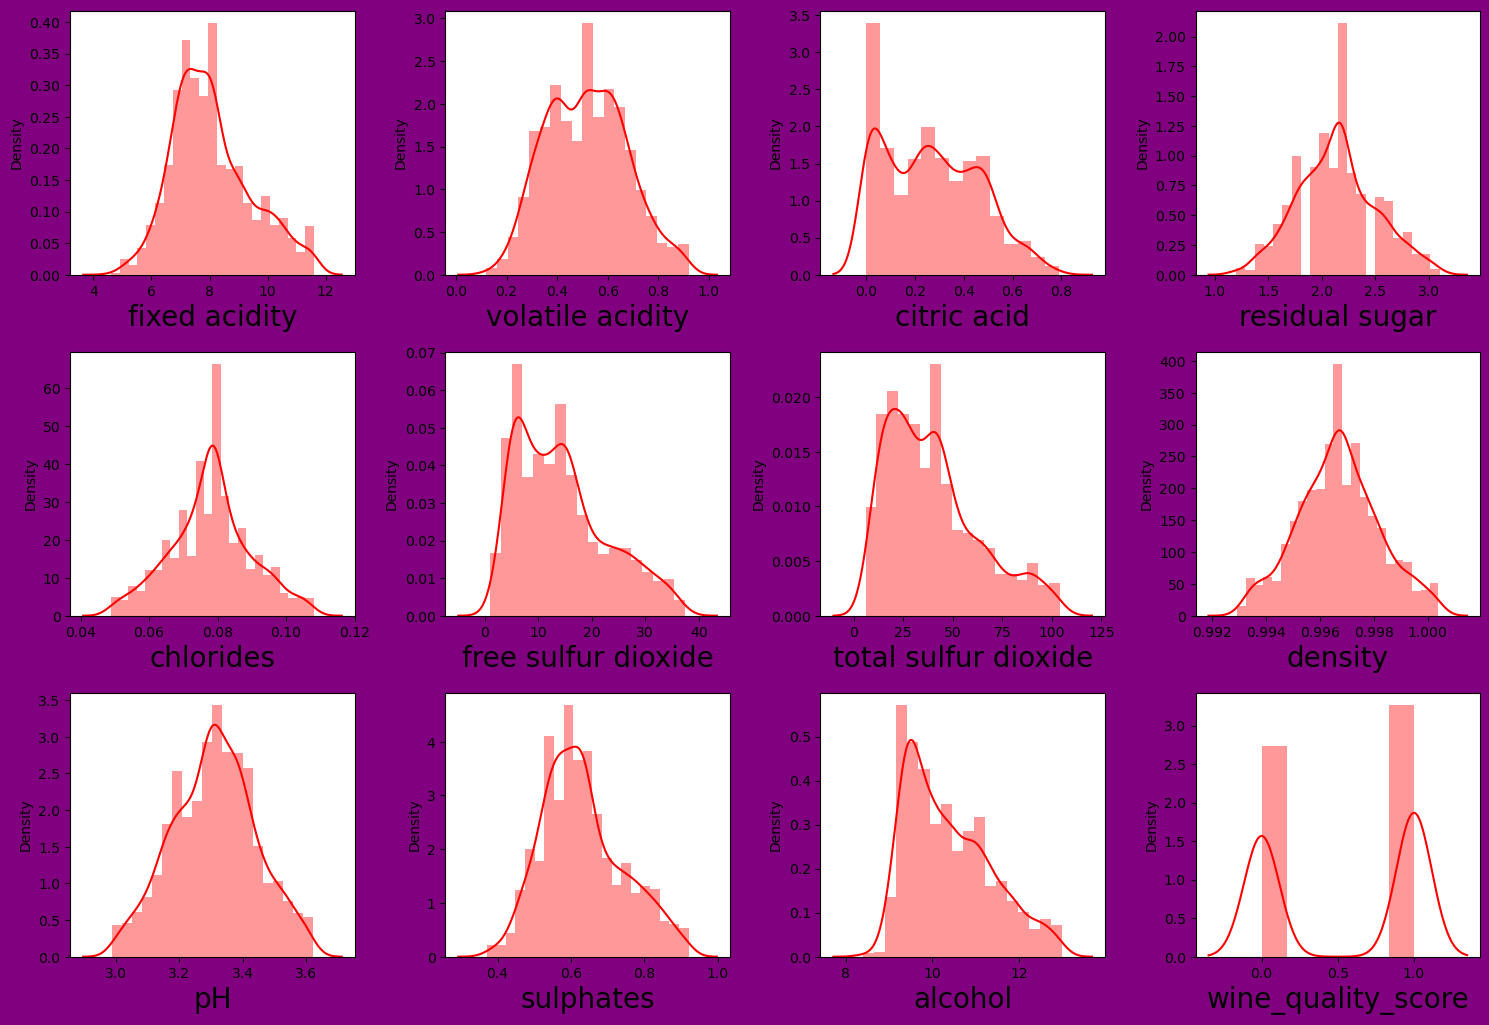

In [409]:
graph1(col_m, m, 15, 20, 12, 6, 4, 20)

In [410]:
m.skew()

fixed acidity           0.556238
volatile acidity        0.166993
citric acid             0.309281
residual sugar          0.159015
chlorides               0.031674
free sulfur dioxide     0.707407
total sulfur dioxide    0.830531
density                 0.077119
pH                     -0.019966
sulphates               0.479266
alcohol                 0.665644
wine_quality_score     -0.175664
dtype: float64

In [411]:
# removing outliers in the features using zscore
col_z = []
for i in df.columns:
    col_z.append(i)
z = np.abs(zscore(df[col_z]))

z


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,0.492334,1.162636,1.395261,0.663960,0.199293,4.364433e-01,0.310486,0.689147,1.542764,0.643792,0.985391,1.072004
1,0.203274,2.297461,1.395261,1.057863,1.439257,1.218483e+00,1.009256,0.035132,0.828604,0.412966,0.581518,1.072004
2,0.203274,1.540911,1.188953,0.319939,0.992380,3.639269e-02,0.489358,0.165935,0.369630,0.148777,0.581518,1.072004
3,2.253728,1.485287,1.493058,0.663960,0.273772,2.728107e-01,0.729311,0.819950,1.134587,0.467666,0.581518,0.932832
4,0.492334,1.162636,1.395261,0.663960,0.199293,4.364433e-01,0.310486,0.689147,1.542764,0.643792,0.985391,1.072004
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.359511,0.532178,0.982644,0.417985,0.843420,2.045946e+00,0.089436,1.207497,1.083789,0.467666,0.125260,1.072004
1595,1.576305,0.216949,0.879490,0.073964,1.242006,2.099814e-16,0.369381,1.063613,1.619259,1.117472,0.832038,0.932832
1596,1.287246,0.035234,0.724759,0.319939,0.199293,1.691319e+00,0.070533,0.658124,0.854302,1.029409,0.630101,0.932832
1597,1.576305,0.815885,0.776336,0.417985,0.273772,2.045946e+00,0.089436,0.834708,2.001738,0.677156,0.177645,1.072004


In [412]:
s = df[(z<3).all(axis = 1)]

In [413]:
s

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.60000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.30000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.90000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.20000,0.062,14.692133,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.30000,0.076,29.000000,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.00000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [414]:
s.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality_score      0
dtype: int64

In [415]:
# let's check data lost


print('percentage of data lost= ', (df.shape[0]-s.shape[0])/df.shape[0]*100)

percentage of data lost=  0.9380863039399625


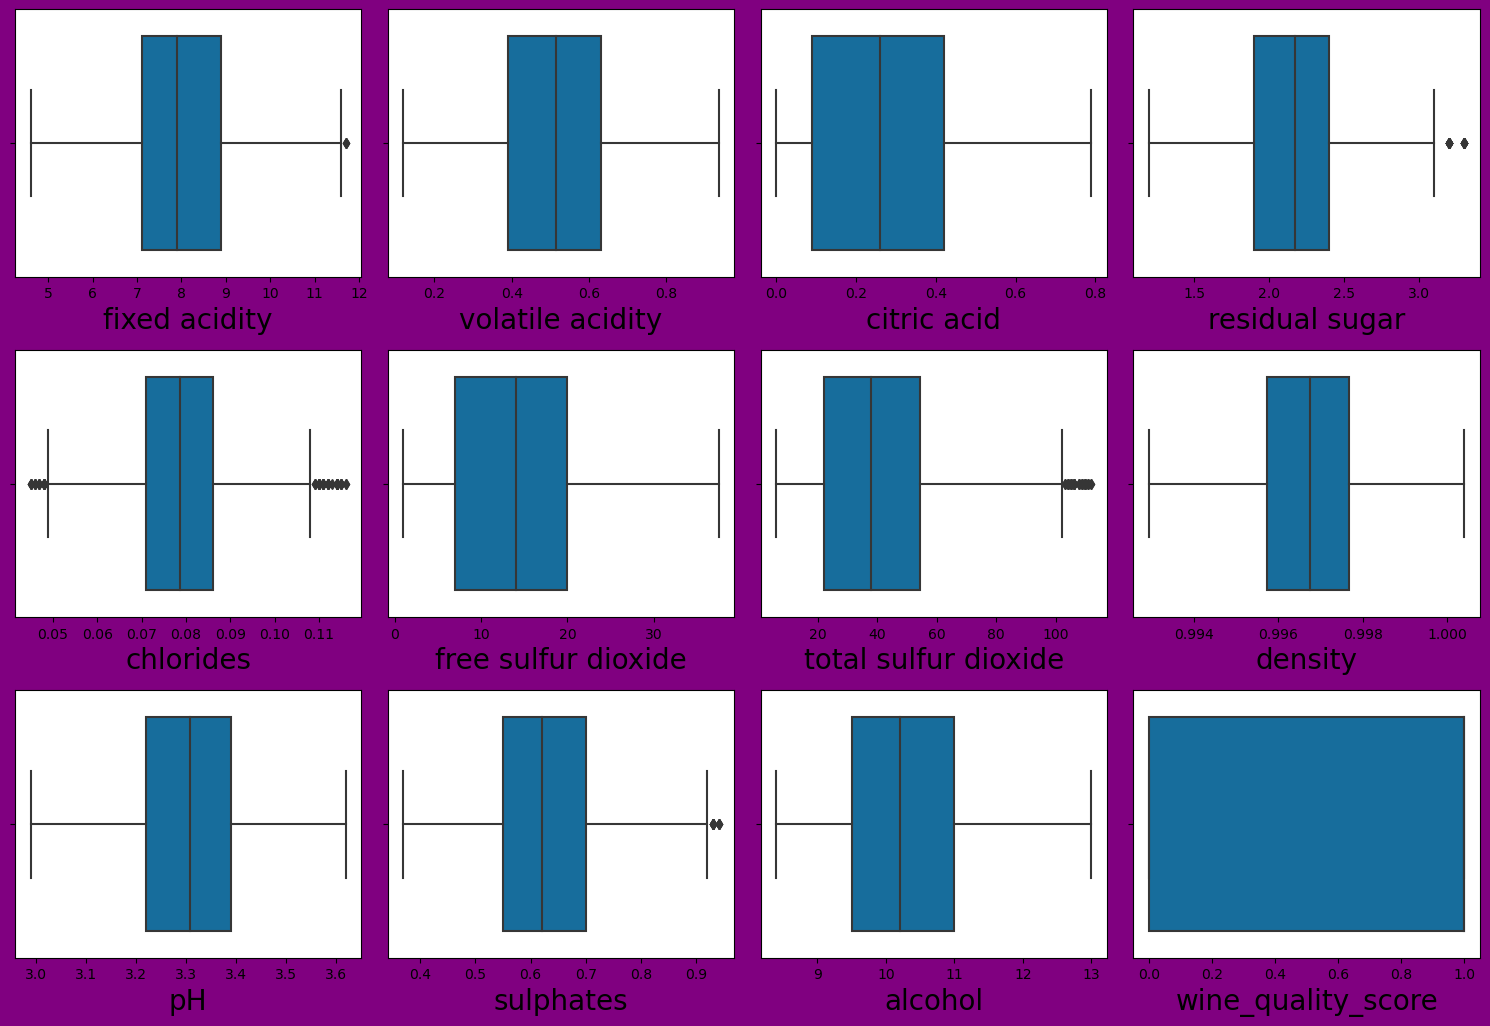

In [416]:
col_s = []
for i in s.columns:
    col_s.append(i)

graph(col_s, s, 12, 6, 4, 20)

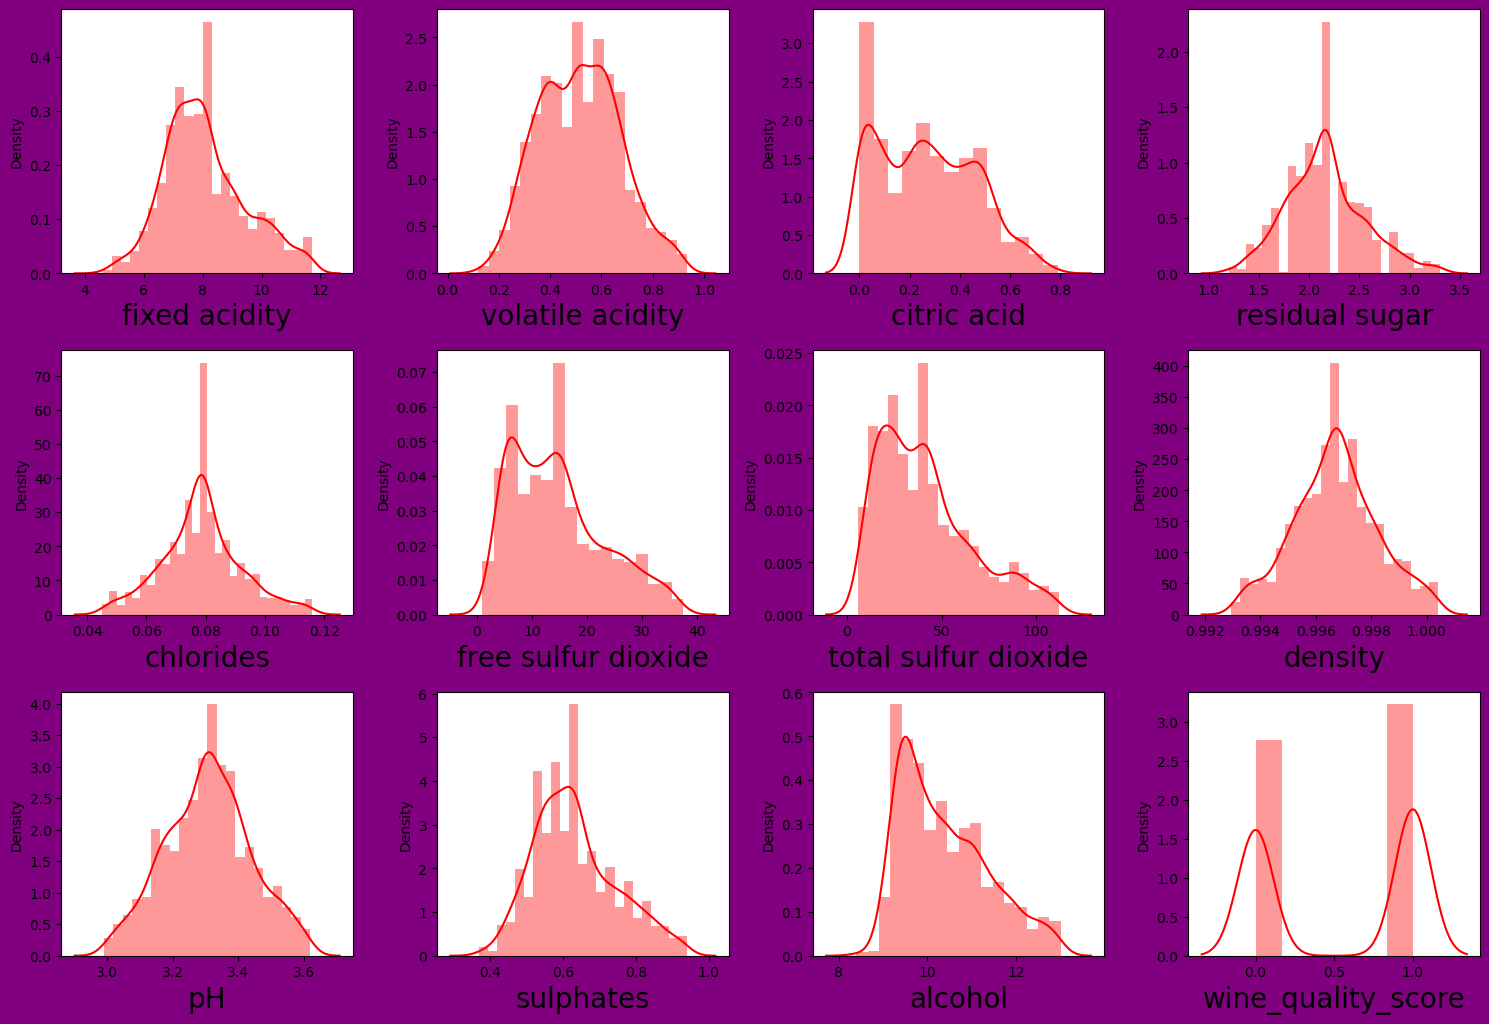

In [417]:
graph1(col_s, s, 15, 20, 12, 6, 4, 20)

In [418]:
s.skew()

fixed acidity           0.501635
volatile acidity        0.163757
citric acid             0.296877
residual sugar          0.375144
chlorides               0.187278
free sulfur dioxide     0.689643
total sulfur dioxide    0.873457
density                 0.058310
pH                      0.024098
sulphates               0.527018
alcohol                 0.691878
wine_quality_score     -0.152096
dtype: float64

 with IQR, we have four columns(fixed acidity, free sulfure dioxide, total sulfur dioxide and alcohol) with skewness, while zsore also leaves fourcolumns(free sulfure dioxide, total sulfur dioxide, alcohol and sulfates) skewed, but with negligeable skewness in sulfures. Moreover, zscore gives a very good data lost percentage as compared with IQR. So, we choose zscore as outlier removal method.

In [419]:
df = s

In [420]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
0,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.60000,0.098,25.000000,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.30000,0.092,15.000000,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.90000,0.075,17.000000,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.90000,0.076,11.000000,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,32.000000,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.20000,0.062,14.692133,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.30000,0.076,29.000000,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.00000,0.075,32.000000,44.0,0.99547,3.57,0.71,10.2,0


In [421]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality_score
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,8.072299,0.515089,0.270398,2.158282,0.078587,14.655321,41.556877,0.996729,3.308558,0.632868,10.377039,0.537879
std,1.385270,0.158660,0.194197,0.390483,0.013410,8.417833,24.826676,0.001521,0.130996,0.113498,0.991346,0.498721
min,4.600000,0.120000,0.000000,1.200000,0.045000,1.000000,6.000000,0.992940,2.990000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995720,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.515589,0.260000,2.169930,0.078676,14.000000,38.000000,0.996746,3.308320,0.620000,10.200000,1.000000
75%,8.900000,0.630000,0.420000,2.400000,0.086000,20.000000,54.250000,0.997680,3.390000,0.700000,11.000000,1.000000
max,11.700000,0.935000,0.790000,3.300000,0.116000,37.500000,112.000000,1.000400,3.620000,0.940000,13.000000,1.000000


In [422]:
df.skew()

fixed acidity           0.501635
volatile acidity        0.163757
citric acid             0.296877
residual sugar          0.375144
chlorides               0.187278
free sulfur dioxide     0.689643
total sulfur dioxide    0.873457
density                 0.058310
pH                      0.024098
sulphates               0.527018
alcohol                 0.691878
wine_quality_score     -0.152096
dtype: float64

 let's remove skewness in free sulfur dioxide, total sulfur dioxide, sulphates and alcohol

In [423]:
# using boxcox method
from scipy import stats

df['free sulfur dioxide'] = stats.boxcox(df['free sulfur dioxide'])[0]
df['total sulfur dioxide'] = stats.boxcox(df['total sulfur dioxide'])[0]
df['alcohol'] = stats.boxcox(df['alcohol'])[0]
df['sulphates'] = stats.boxcox(df['sulphates'])[0]



In [424]:
df.skew()

fixed acidity           0.501635
volatile acidity        0.163757
citric acid             0.296877
residual sugar          0.375144
chlorides               0.187278
free sulfur dioxide    -0.047273
total sulfur dioxide   -0.030319
density                 0.058310
pH                      0.024098
sulphates               0.004058
alcohol                 0.096617
wine_quality_score     -0.152096
dtype: float64

skewness have been removed from df.

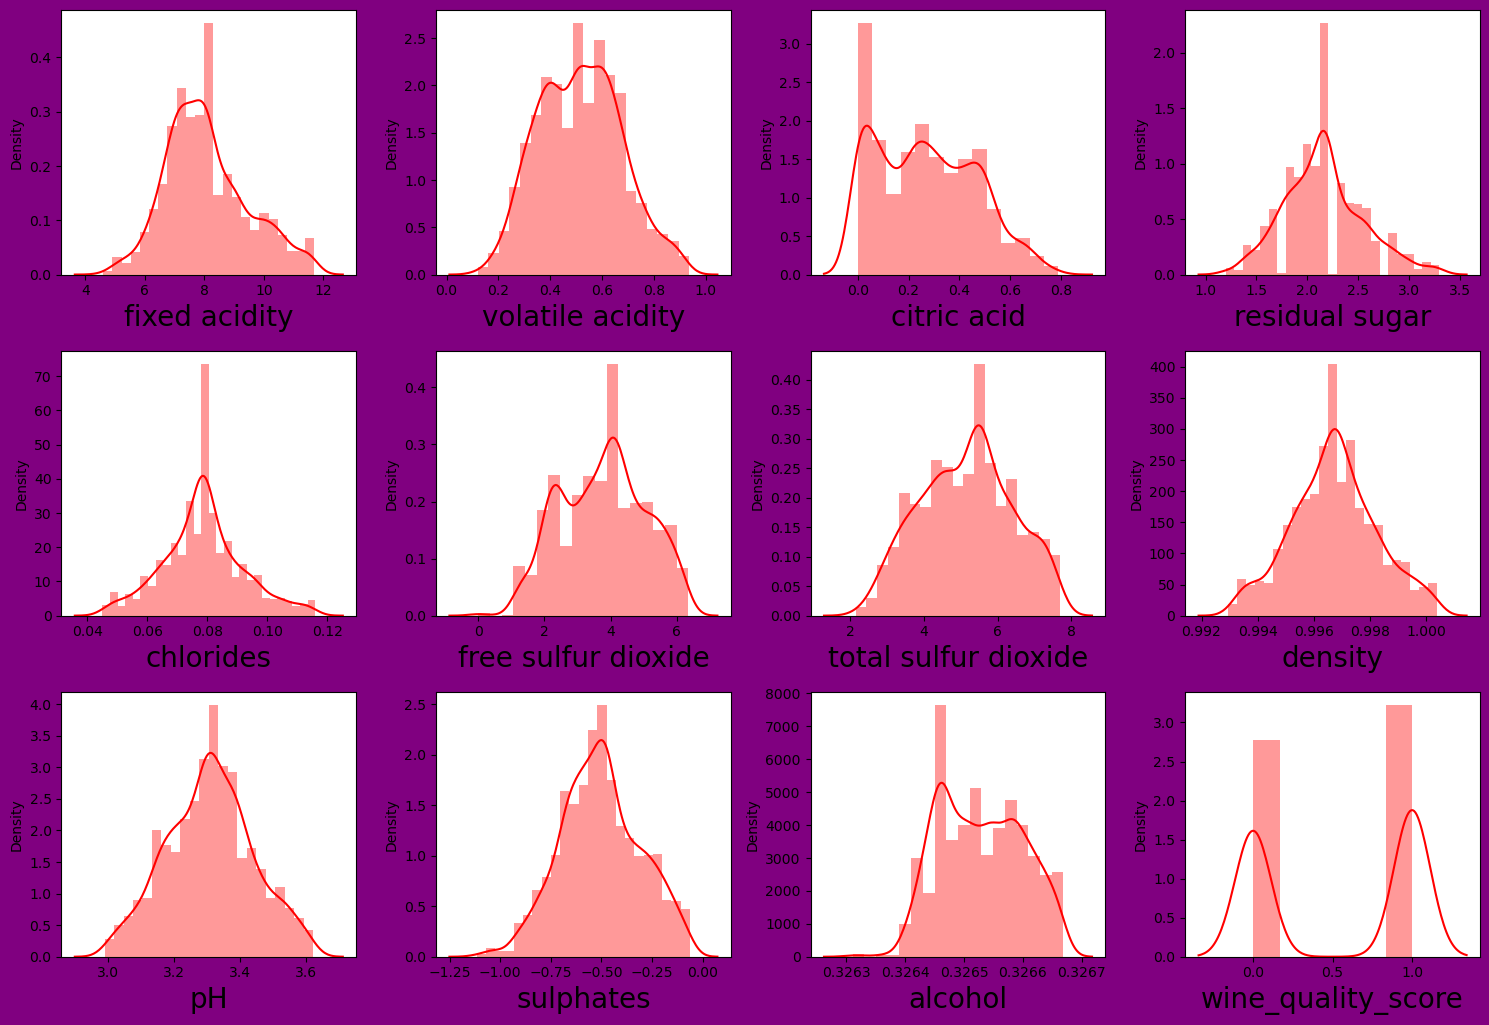

In [425]:
# Visualising again to check
nam_col = []
for i in df.columns:
    nam_col.append(i)
    

graph1(nam_col, df, 15, 20, 12, 6, 4, 20)


from this graph, we can confirm that skewness has been removed

Checking multicolinearity

In [426]:
# separating features 
feat = df.drop('wine_quality_score', axis = 1)

In [427]:
feat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.90000,0.076,3.443447,5.053351,0.99780,3.51,-0.619697,0.326452
1,7.8,0.880,0.00,2.60000,0.098,5.278550,6.485486,0.99680,3.20,-0.403043,0.326493
2,7.8,0.760,0.04,2.30000,0.092,4.086689,6.009568,0.99700,3.26,-0.452544,0.326493
3,11.2,0.280,0.56,1.90000,0.075,4.362842,6.239549,0.99800,3.16,-0.579829,0.326493
4,7.4,0.700,0.00,1.90000,0.076,3.443447,5.053351,0.99780,3.51,-0.619697,0.326452
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,5.919904,5.575714,0.99490,3.45,-0.579829,0.326551
1595,5.9,0.550,0.10,2.20000,0.062,4.041879,5.886748,0.99512,3.52,-0.283163,0.326595
1596,6.3,0.510,0.13,2.30000,0.076,5.658719,5.379578,0.99574,3.42,-0.297281,0.326583
1597,5.9,0.645,0.12,2.00000,0.075,5.919904,5.575714,0.99547,3.57,-0.356152,0.326528


In [429]:
feat.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.252045,0.579753,0.215664,0.196837,-0.158731,-0.111232,0.493737,-0.561398,0.167242,-0.061453
volatile acidity,-0.252045,1.000000,-0.567874,0.015863,0.139498,0.045193,0.088396,0.029775,0.215948,-0.287584,-0.212565
citric acid,0.579753,-0.567874,1.000000,0.151528,0.078856,-0.085870,-0.026406,0.309032,-0.515893,0.283413,0.102046
residual sugar,0.215664,0.015863,0.151528,1.000000,0.212655,0.097941,0.139486,0.347431,-0.059875,0.053055,0.096630
chlorides,0.196837,0.139498,0.078856,0.212655,1.000000,0.016611,0.126062,0.327603,-0.156778,-0.060569,-0.243229
free sulfur dioxide,-0.158731,0.045193,-0.085870,0.097941,0.016611,1.000000,0.725869,-0.031079,0.113468,0.022982,-0.080757
total sulfur dioxide,-0.111232,0.088396,-0.026406,0.139486,0.126062,0.725869,1.000000,0.120621,0.019913,0.012931,-0.235940
density,0.493737,0.029775,0.309032,0.347431,0.327603,-0.031079,0.120621,1.000000,-0.243329,0.099119,-0.421937
pH,-0.561398,0.215948,-0.515893,-0.059875,-0.156778,0.113468,0.019913,-0.243329,1.000000,-0.028728,0.153854
sulphates,0.167242,-0.287584,0.283413,0.053055,-0.060569,0.022982,0.012931,0.099119,-0.028728,1.000000,0.221104


<AxesSubplot:>

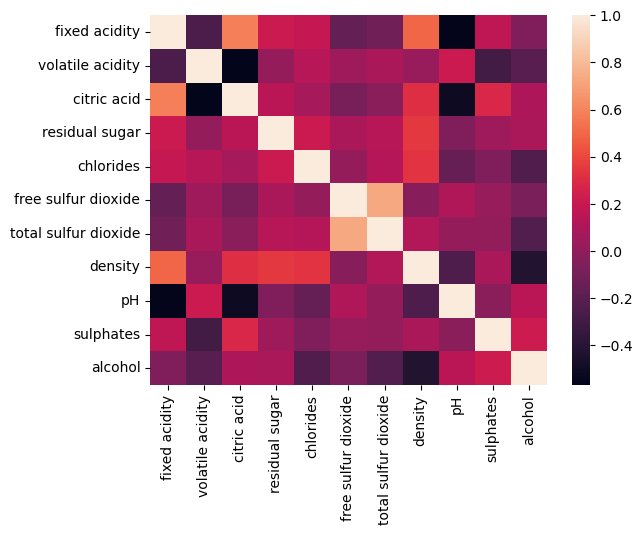

In [430]:
# visualising correlation with heatmap
sns.heatmap(feat.corr())


This shows that the only multicolinearity exists between free sulfur dioxide and total sufur dioxide. But, before we drop any of both, we first have to check how much important each of both is for the taget variable.

In [431]:
# checking how each feature is correlated with the target variable

df.corr()['wine_quality_score'].sort_values(ascending = False)

wine_quality_score      1.000000
alcohol                 0.431936
sulphates               0.356533
citric acid             0.159810
fixed acidity           0.083783
residual sugar          0.032334
pH                     -0.006948
free sulfur dioxide    -0.053814
density                -0.132521
total sulfur dioxide   -0.145111
chlorides              -0.161222
volatile acidity       -0.305820
Name: wine_quality_score, dtype: float64

1 - Here, we should drop free sulfur dioxide(as it was strongly corralated with total sulfur dioxide).


2 - As long as none of other features has a very strong correlation with the target, we can use the variance inflation to choose features which are less correlated with the others.

In [452]:
feat.drop('free sulfur dioxide', axis = 1, inplace = True)

In [467]:
feat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.700,0.00,1.90000,0.076,5.053351,0.99780,-0.619697,0.326452,3.51
1,7.8,0.880,0.00,2.60000,0.098,6.485486,0.99680,-0.403043,0.326493,3.20
2,7.8,0.760,0.04,2.30000,0.092,6.009568,0.99700,-0.452544,0.326493,3.26
3,11.2,0.280,0.56,1.90000,0.075,6.239549,0.99800,-0.579829,0.326493,3.16
4,7.4,0.700,0.00,1.90000,0.076,5.053351,0.99780,-0.619697,0.326452,3.51
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00000,0.090,5.575714,0.99490,-0.579829,0.326551,3.45
1595,5.9,0.550,0.10,2.20000,0.062,5.886748,0.99512,-0.283163,0.326595,3.52
1596,6.3,0.510,0.13,2.30000,0.076,5.379578,0.99574,-0.297281,0.326583,3.42
1597,5.9,0.645,0.12,2.00000,0.075,5.575714,0.99547,-0.356152,0.326528,3.57


Features scaling 

In [468]:
x = feat
y = df['wine_quality_score']

In [469]:
# using standarscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,pH
0,-0.485473,1.165823,-1.392826,-0.661651,-0.192953,-0.081357,0.704549,-0.590660,-1.078552,1.538256
1,-0.196630,2.300681,-1.392826,1.131568,1.448149,1.062704,0.046903,0.510736,-0.496201,-0.828973
2,-0.196630,1.544109,-1.186785,0.363045,1.000576,0.682517,0.178432,0.259091,-0.496201,-0.370800
3,2.258541,-1.482180,1.491749,-0.661651,-0.267548,0.866237,0.836078,-0.387986,-0.496201,-1.134422
4,-0.485473,1.165823,-1.392826,-0.661651,-0.192953,-0.081357,0.704549,-0.590660,-1.078552,1.538256
...,...,...,...,...,...,...,...,...,...,...
1579,-1.352004,0.535346,-0.980744,-0.405477,0.851385,0.335933,-1.202625,-0.387986,0.318721,1.080082
1580,-1.568637,0.220107,-0.877723,0.106871,-1.237291,0.584402,-1.057942,1.120167,0.940021,1.614618
1581,-1.279793,-0.032083,-0.723193,0.363045,-0.192953,0.179250,-0.650202,1.048398,0.778719,0.850996
1582,-1.568637,0.819060,-0.774703,-0.405477,-0.267548,0.335933,-0.827766,0.749115,-0.002850,1.996429


In [470]:
x = scaled

In [471]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,pH
0,-0.485473,1.165823,-1.392826,-0.661651,-0.192953,-0.081357,0.704549,-0.590660,-1.078552,1.538256
1,-0.196630,2.300681,-1.392826,1.131568,1.448149,1.062704,0.046903,0.510736,-0.496201,-0.828973
2,-0.196630,1.544109,-1.186785,0.363045,1.000576,0.682517,0.178432,0.259091,-0.496201,-0.370800
3,2.258541,-1.482180,1.491749,-0.661651,-0.267548,0.866237,0.836078,-0.387986,-0.496201,-1.134422
4,-0.485473,1.165823,-1.392826,-0.661651,-0.192953,-0.081357,0.704549,-0.590660,-1.078552,1.538256
...,...,...,...,...,...,...,...,...,...,...
1579,-1.352004,0.535346,-0.980744,-0.405477,0.851385,0.335933,-1.202625,-0.387986,0.318721,1.080082
1580,-1.568637,0.220107,-0.877723,0.106871,-1.237291,0.584402,-1.057942,1.120167,0.940021,1.614618
1581,-1.279793,-0.032083,-0.723193,0.363045,-0.192953,0.179250,-0.650202,1.048398,0.778719,0.850996
1582,-1.568637,0.819060,-0.774703,-0.405477,-0.267548,0.335933,-0.827766,0.749115,-0.002850,1.996429


In [472]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(x.columns)):
    z.append(variance_inflation_factor(x.values, i))
Vif = pd.DataFrame(z)

Vif['Features'] = x.columns
Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)




In [473]:
Vif

,VIF Values,Features
0,2.213959,fixed acidity
1,1.675007,volatile acidity
2,2.501587,citric acid
3,1.316153,residual sugar
4,1.202371,chlorides
5,1.147429,total sulfur dioxide
6,2.139868,density
7,1.205606,sulphates
8,1.715636,alcohol
9,1.735815,pH


In [474]:
Vif.sort_values(by = 'VIF Values', ascending = False)

,VIF Values,Features
2,2.501587,citric acid
0,2.213959,fixed acidity
6,2.139868,density
9,1.735815,pH
8,1.715636,alcohol
1,1.675007,volatile acidity
3,1.316153,residual sugar
7,1.205606,sulphates
4,1.202371,chlorides
5,1.147429,total sulfur dioxide


As citric acid is among the top 3 most important features (3rd ranked correlation with the taget variable), let’s set our VIF treshold to 2.5 so as to keep this variable. Doing this, all our ten remaining features will be kept

In [475]:
x.shape

(1584, 10)

In [476]:
y.shape

(1584,)

In [480]:
# checking the classes imbalance in y

y.value_counts()

1    852
0    732
Name: wine_quality_score, dtype: int64

<AxesSubplot:xlabel='wine_quality_score', ylabel='count'>

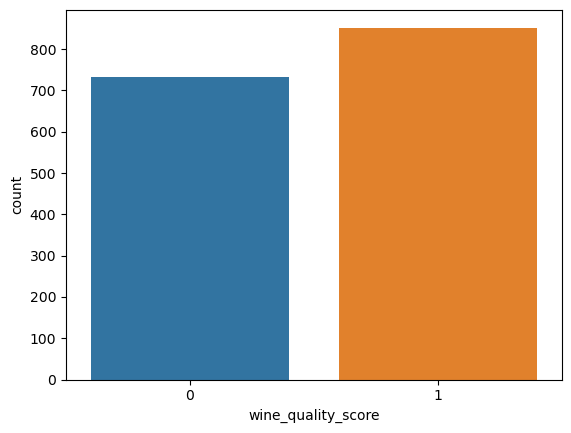

In [482]:
# visualising the difference

sns.countplot(x = 'wine_quality_score', data = df)

We can clearly observe that there is no significant gap between the classes 0 and 1. This confirms that y is balanced

## Modelling

Importing the necessary libraries

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

Separate data into train and test

In [485]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

Selecting the best algorithm

In [494]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    score = cross_val_score(model,x,y)
    print(accuracy_score(y_test, pred_model))
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')
    




0.6994949494949495
[[136  54]
 [ 65 141]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       190
           1       0.72      0.68      0.70       206

    accuracy                           0.70       396
   macro avg       0.70      0.70      0.70       396
weighted avg       0.70      0.70      0.70       396

[0.68138801 0.71608833 0.78233438 0.72870662 0.73734177]
0.7291718244619254
The difference between accuracy score and cross validation score of  LogisticRegression() is:  -0.029676874966975908


0.7803030303030303
[[148  42]
 [ 45 161]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       190
           1       0.79      0.78      0.79       206

    accuracy                           0.78       396
   macro avg       0.78      0.78      0.78       396
weighted avg       0.78      0.78      0.78       396

[0.69085174 0.70031546 0.76656151 0.69716088 0.7278481 ]
0.71654753

Our best model is AdaBoostClassifier() since it has the least difference. 

Hyper parameter tuning of AdaBoostClassifier() model

# NB: Here I tried to use SearchCV to search for the best parameters, but it kept giving error. As consequence, I am going to randomly select parameters, beased on past experience, to tune the model

    

In [519]:
my_model = AdaBoostClassifier(n_estimators = 500, random_state = 100)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 


Acuuracy Score= 73.23232323232324


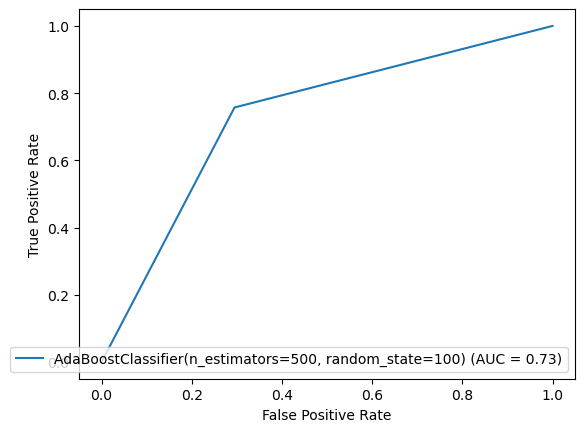

In [523]:
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()

Saving the model

In [524]:
pickle.dump(my_model, open('Red_wine_Romuald.pkl', 'wb'))

In [525]:
saved_model = pickle.load(open('Red_wine_Romuald.pkl', 'rb'))


In [527]:
saved_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [528]:
y_test

824     0
1126    1
1590    1
234     1
117     1
       ..
594     0
993     0
111     0
200     1
68      0
Name: wine_quality_score, Length: 396, dtype: int64